In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings('ignore')

## Reading and processing dataset

In [6]:
dataset_root = '/content/drive/MyDrive/빅데이터응용보안'

In [7]:
train_file = os.path.join(dataset_root, 'KDDTrain+.txt')
test_file = os.path.join(dataset_root, 'KDDTest+.txt')

In [8]:
# Original KDD dataset feature names obtained from
# http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names
# http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']

In [9]:
len(header_names) #43개 feature

43

In [10]:
# Differentiating between nominal, binary, and numeric features

# root_shell is marked as a continuous feature in the kddcup.names
# file, but it is supposed to be a binary feature according to the
# dataset documentation

col_names = np.array(header_names)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [11]:
# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

category = defaultdict(list)
category['benign'].append('normal')

with open('/content/drive/MyDrive/빅데이터응용보안/training_attack_types.txt', 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])

In [12]:
attack_mapping #lable 넣어주기

{'normal': 'benign',
 'apache2': 'dos',
 'back': 'dos',
 'mailbomb': 'dos',
 'processtable': 'dos',
 'snmpgetattack': 'dos',
 'teardrop': 'dos',
 'smurf': 'dos',
 'land': 'dos',
 'neptune': 'dos',
 'pod': 'dos',
 'udpstorm': 'dos',
 'ps': 'u2r',
 'buffer_overflow': 'u2r',
 'perl': 'u2r',
 'rootkit': 'u2r',
 'loadmodule': 'u2r',
 'xterm': 'u2r',
 'sqlattack': 'u2r',
 'httptunnel': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'snmpguess': 'r2l',
 'imap': 'r2l',
 'spy': 'r2l',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'multihop': 'r2l',
 'phf': 'r2l',
 'named': 'r2l',
 'sendmail': 'r2l',
 'xlock': 'r2l',
 'xsnoop': 'r2l',
 'worm': 'probe',
 'nmap': 'probe',
 'ipsweep': 'probe',
 'portsweep': 'probe',
 'satan': 'probe',
 'mscan': 'probe',
 'saint': 'probe'}

## Generating and analyzing train and test sets

In [13]:
train_df = pd.read_csv(train_file, names=header_names)
train_df['attack_category'] = train_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])
train_df.drop(['success_pred'], axis=1, inplace=True)

test_df = pd.read_csv(test_file, names=header_names)
test_df['attack_category'] = test_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'], axis=1, inplace=True)

In [14]:

header_names

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'attack_type',
 'success_pred']

In [15]:
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,attack_category
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,benign
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,benign
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,benign
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,dos
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,benign
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,benign
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,dos


In [16]:
len(train_df.columns) #40개 feature -> attack type -> attack category로 분류

43

In [17]:
train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()

In [18]:
test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()

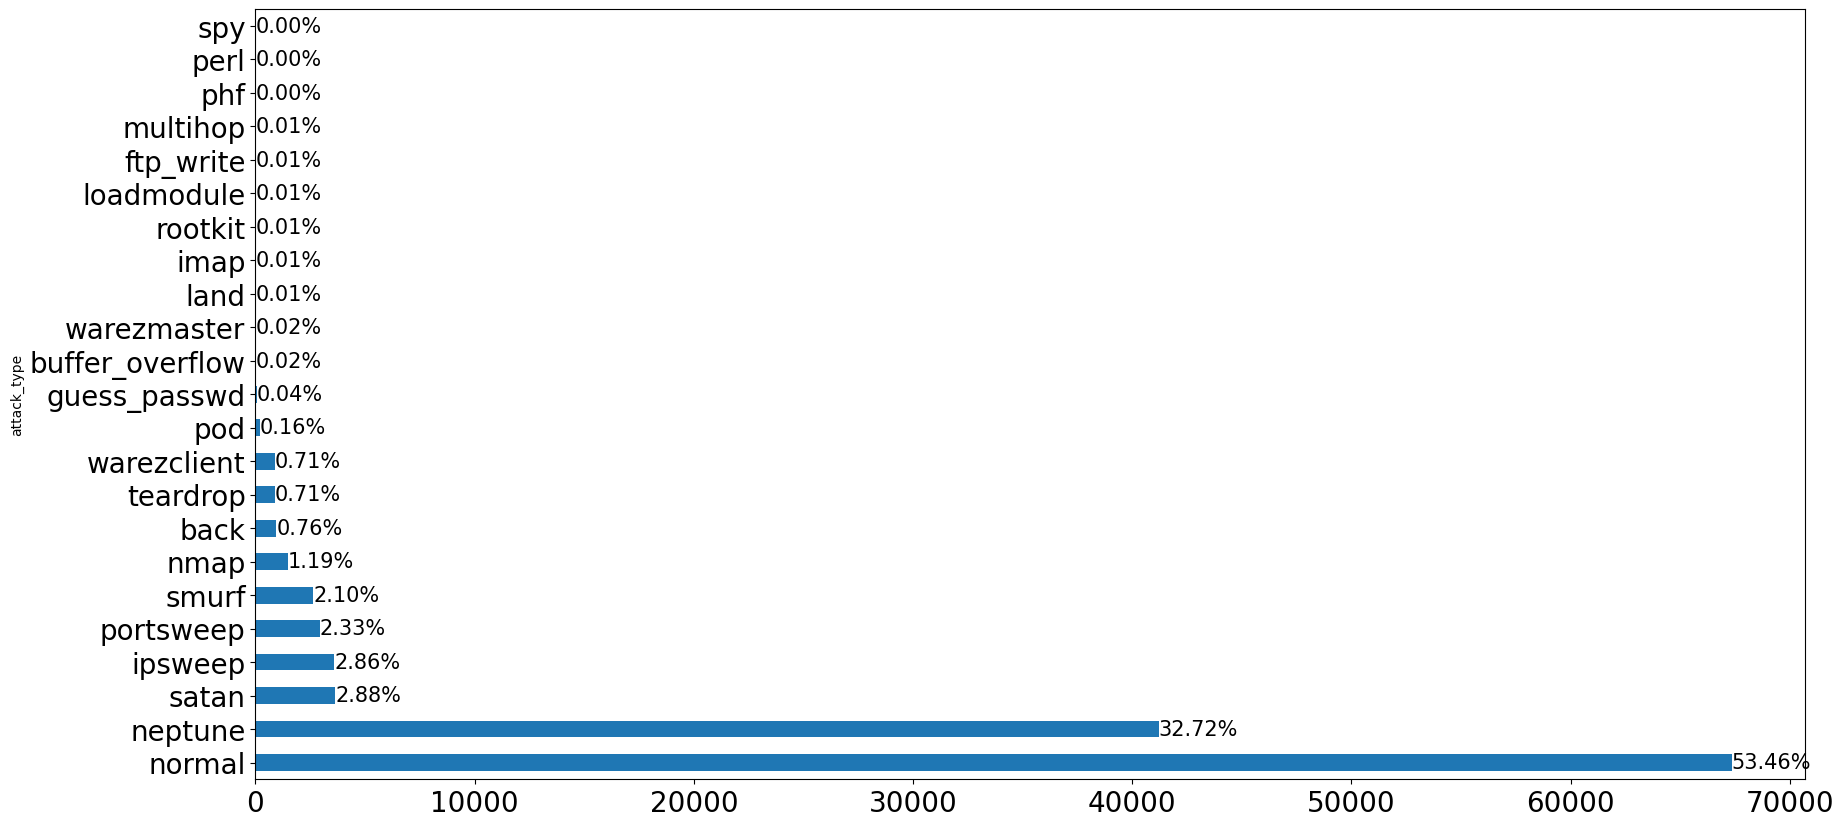

In [19]:
import matplotlib.pyplot as plt

# 데이터프레임의 각 행을 합산하여 퍼센트 계산
percentages = (train_attack_types / train_attack_types.sum()) * 100

# 바 그래프 생성
ax = train_attack_types.plot(kind='barh', figsize=(20, 10), fontsize=20)

# 각 막대에 퍼센트 라벨 추가
for index, value in enumerate(train_attack_types):
    ax.text(value, index, f'{percentages[index]:.2f}%', fontsize=15, va='center')

plt.show()


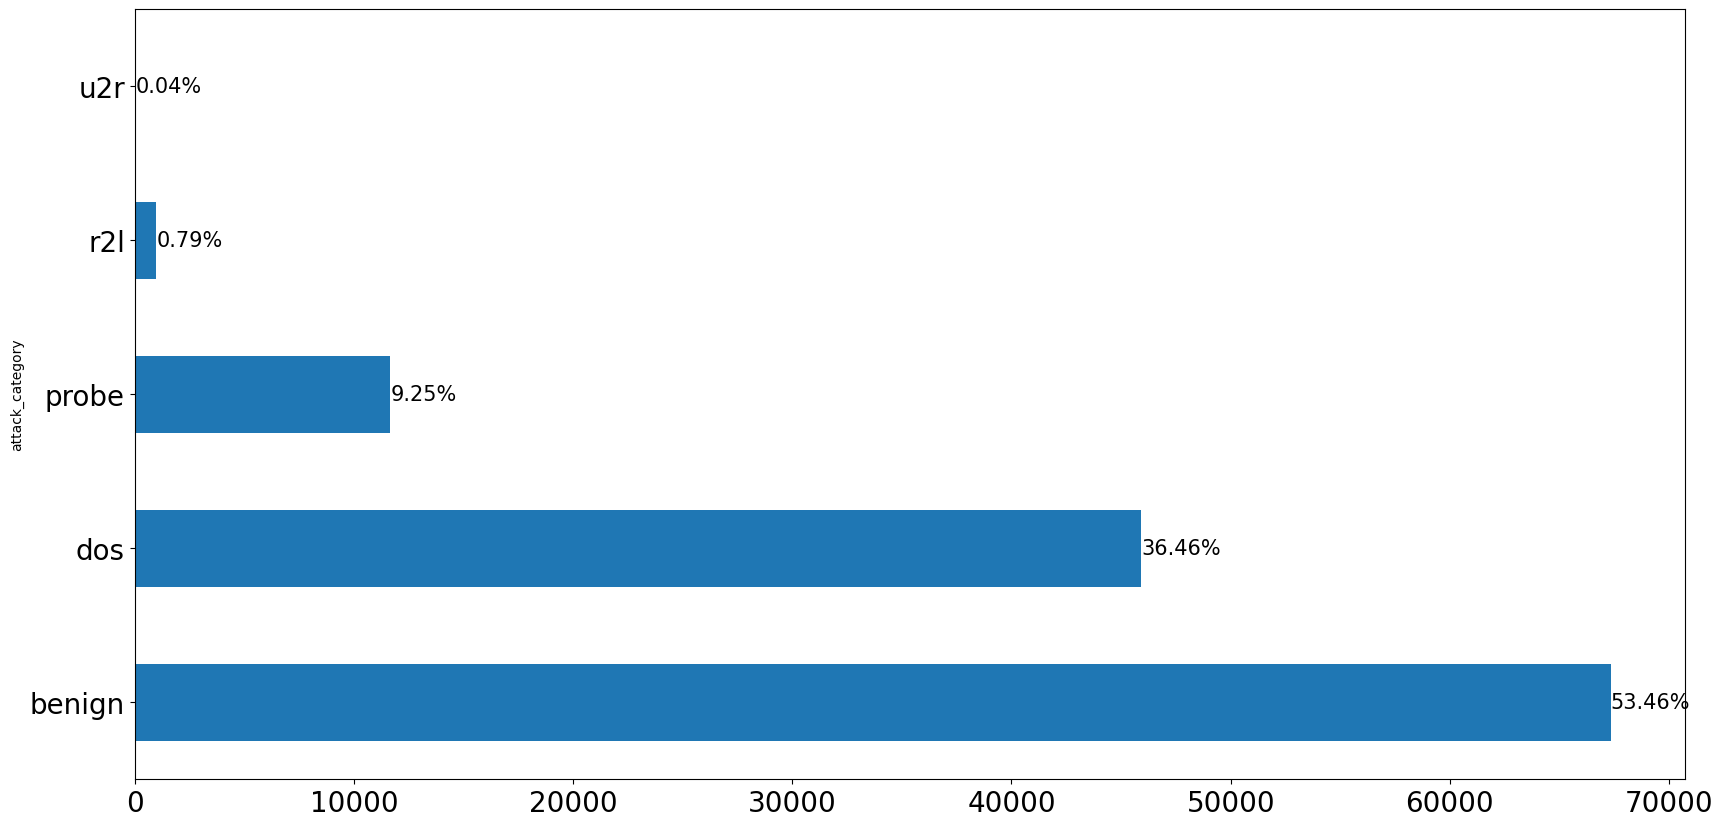

In [20]:
import matplotlib.pyplot as plt

# 데이터프레임의 각 행을 합산하여 퍼센트 계산
percentages = (train_attack_cats / train_attack_cats.sum()) * 100

# 바 그래프 생성
ax = train_attack_cats.plot(kind='barh', figsize=(20, 10), fontsize=20)

# 각 막대에 퍼센트 라벨 추가
for index, value in enumerate(train_attack_cats):
    ax.text(value, index, f'{percentages[index]:.2f}%', fontsize=15, va='center')

plt.show()

<Axes: ylabel='attack_type'>

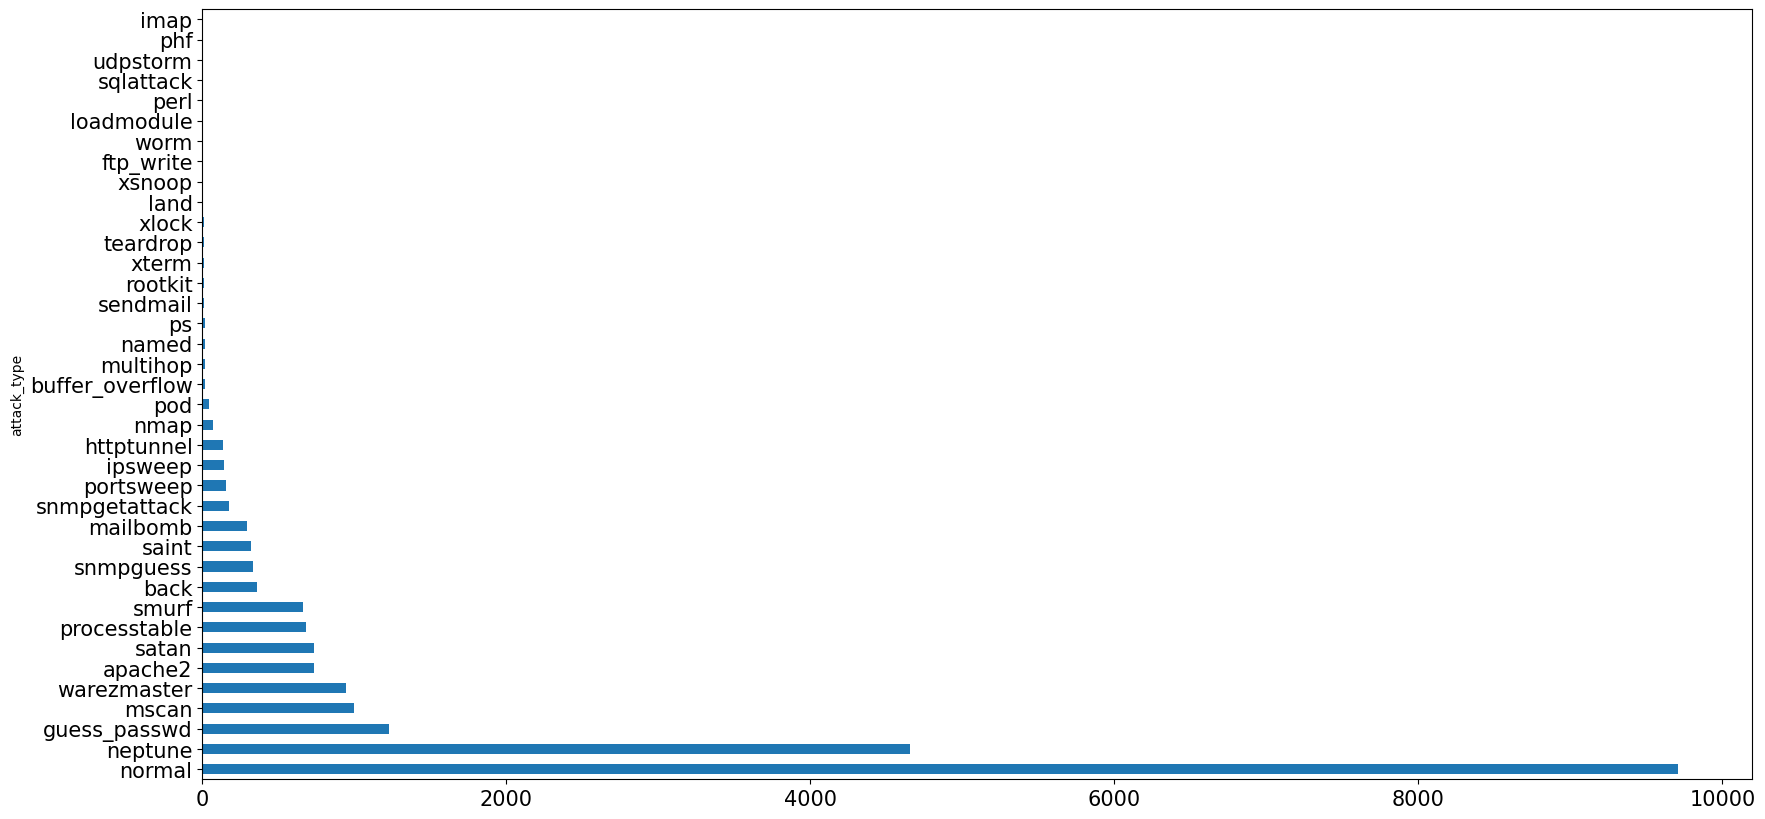

In [21]:
test_attack_types.plot(kind='barh', figsize=(20,10), fontsize=15)

<Axes: ylabel='attack_category'>

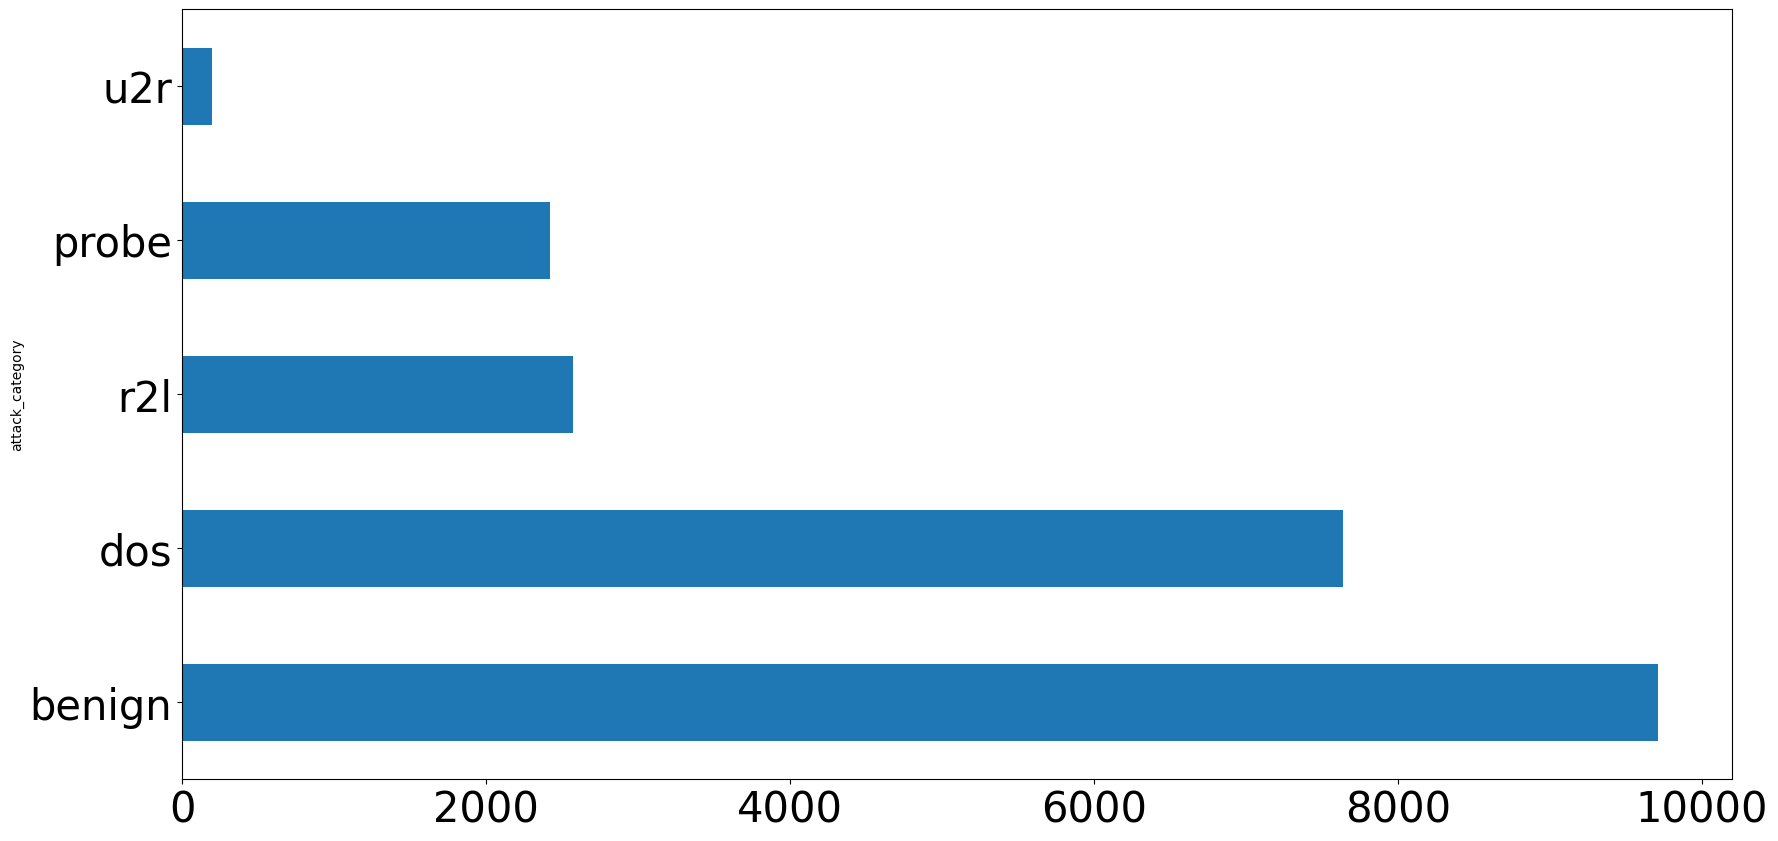

In [22]:

test_attack_cats.plot(kind='barh', figsize=(20,10), fontsize=30)

In [23]:
binary_cols

['land',
 'logged_in',
 'root_shell',
 'su_attempted',
 'is_host_login',
 'is_guest_login']

In [24]:
# Let's take a look at the binary features
# By definition, all of these features should have a min of 0.0 and a max of 1.0

train_df[binary_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
land,125973.0,0.000198,0.014086,0.0,0.0,0.0,0.0,1.0
logged_in,125973.0,0.395736,0.489010,0.0,0.0,0.0,1.0,1.0
root_shell,125973.0,0.001342,0.036603,0.0,0.0,0.0,0.0,1.0
su_attempted,125973.0,0.001103,0.045154,0.0,0.0,0.0,0.0,2.0
is_host_login,125973.0,0.000008,0.002817,0.0,0.0,0.0,0.0,1.0
is_guest_login,125973.0,0.009423,0.096612,0.0,0.0,0.0,0.0,1.0


In [25]:
# Wait a minute... the su_attempted column has a max value of 2.0?

train_df.groupby(['su_attempted']).size()

su_attempted
0    125893
1        21
2        59
dtype: int64

In [26]:
# Let's fix this discrepancy and assume that su_attempted=2 -> su_attempted=0

train_df['su_attempted'].replace(2, 0, inplace=True)
test_df['su_attempted'].replace(2, 0, inplace=True)
train_df.groupby(['su_attempted']).size()

su_attempted
0    125952
1        21
dtype: int64

In [27]:
# Next, we notice that the num_outbound_cmds column only takes on one value!

train_df.groupby(['num_outbound_cmds']).size()

num_outbound_cmds
0    125973
dtype: int64

In [28]:


# Now, that's not a very useful feature - let's drop it from the dataset

train_df.drop('num_outbound_cmds', axis = 1, inplace=True)
test_df.drop('num_outbound_cmds', axis = 1, inplace=True)
numeric_cols.remove('num_outbound_cmds')

In [29]:
len(train_df.columns)

42

## Data preparation

In [30]:
train_Y = train_df['attack_category']
train_x_raw = train_df.drop(['attack_category','attack_type'], axis=1)
test_Y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category','attack_type'], axis=1)

In [31]:
combined_df_raw = pd.concat([train_x_raw, test_x_raw])
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]

# Store dummy variable feature names
dummy_variables = list(set(train_x)-set(combined_df_raw))

In [32]:
train_x.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 1-1. ML - Sampling + Decision Tree (RandomUnderSampler vs No sampling)
RUS 적용 시 label별 case 수
* benign    52
* dos       52
* probe     52
* r2l       52
* u2r       52

              precision    recall  f1-score   support

      benign       0.75      0.90      0.82      9711
         dos       0.93      0.70      0.80      7636
       probe       0.53      0.76      0.62      2423
         r2l       0.51      0.15      0.24      2574
         u2r       0.07      0.30      0.12       200

    accuracy                           0.73     22544
   macro avg       0.56      0.56      0.52     22544
weighted avg       0.75      0.73      0.72     22544



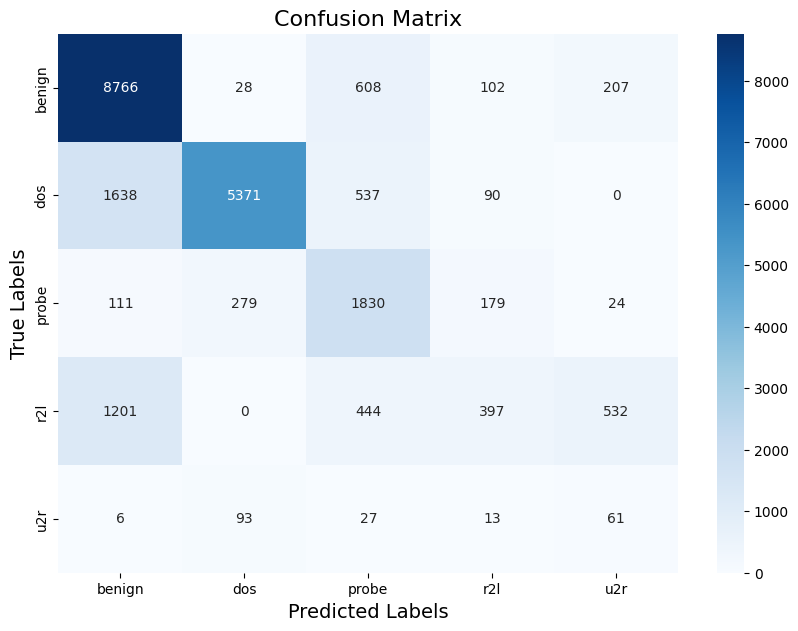

Confusion Matrix:
 [[8766   28  608  102  207]
 [1638 5371  537   90    0]
 [ 111  279 1830  179   24]
 [1201    0  444  397  532]
 [   6   93   27   13   61]]
Zero-One Loss: 0.2714247693399574


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.under_sampling import RandomUnderSampler

mean_class_size = int(pd.Series(train_Y).value_counts().sum()/5)

ratio = {'benign': mean_class_size,
         'dos': mean_class_size,
         'probe': mean_class_size,
         'r2l': mean_class_size,
         'u2r': mean_class_size}

rus = RandomUnderSampler(random_state=0, replacement=True)
train_x_rus, train_Y_rus = rus.fit_resample(train_x, train_Y)

# 클래스 레이블을 정의합니다
class_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']

# 모델 학습
classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(train_x_rus, train_Y_rus)

# 예측
pred_y = classifier.predict(test_x)

# 혼동 행렬 및 에러 계산
results = confusion_matrix(test_Y, pred_y, labels=class_labels)
error = zero_one_loss(test_Y, pred_y)

# 혼동 행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(results, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
print(classification_report(test_Y, pred_y))

# 축 설명 추가
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

plt.show()

# 결과 출력
print("Confusion Matrix:\n", results)
print("Zero-One Loss:", error)

              precision    recall  f1-score   support

      benign       0.67      0.96      0.79      9711
         dos       0.96      0.79      0.86      7636
       probe       0.79      0.63      0.70      2423
         r2l       0.98      0.11      0.19      2574
         u2r       0.79      0.07      0.14       200

    accuracy                           0.76     22544
   macro avg       0.84      0.51      0.54     22544
weighted avg       0.81      0.76      0.73     22544



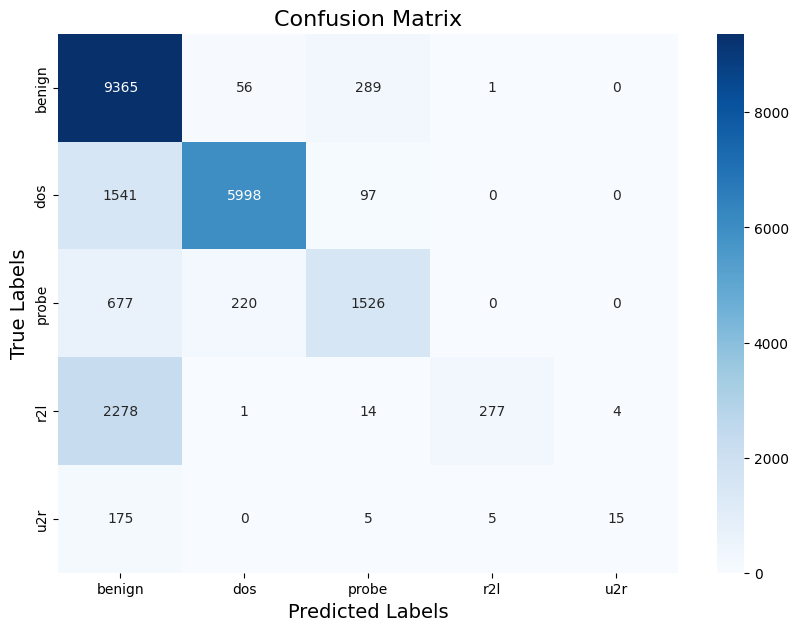

Confusion Matrix:
 [[9365   56  289    1    0]
 [1541 5998   97    0    0]
 [ 677  220 1526    0    0]
 [2278    1   14  277    4]
 [ 175    0    5    5   15]]
Zero-One Loss: 0.2378903477643719


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report, confusion_matrix

# 클래스 레이블을 정의합니다
class_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']

# 모델 학습
classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(train_x, train_Y)

# 예측
pred_y = classifier.predict(test_x)

# 혼동 행렬 및 에러 계산
results = confusion_matrix(test_Y, pred_y, labels=class_labels)
error = zero_one_loss(test_Y, pred_y)

# 혼동 행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(results, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
print(classification_report(test_Y, pred_y))

# 축 설명 추가
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

plt.show()

# 결과 출력
print("Confusion Matrix:\n", results)
print("Zero-One Loss:", error)

* benign으로 착각함
* r2l과 benign의 구분
* dos와 benign의 구분
* u2r과 probe의 구분

* 근데 r2l과 u2r은 test와 training간의 모수 격차가 크기 때문에 예측이 힘듦

# 1-2. ML - 2 layers (r2l, u2r에 대한 separate detection)

* 1 layer:  전체 학습 데이터
* 2 layer: (r2l,u2r,benign) 구분을 따로
* 3 layer: combine하여 최종 예측

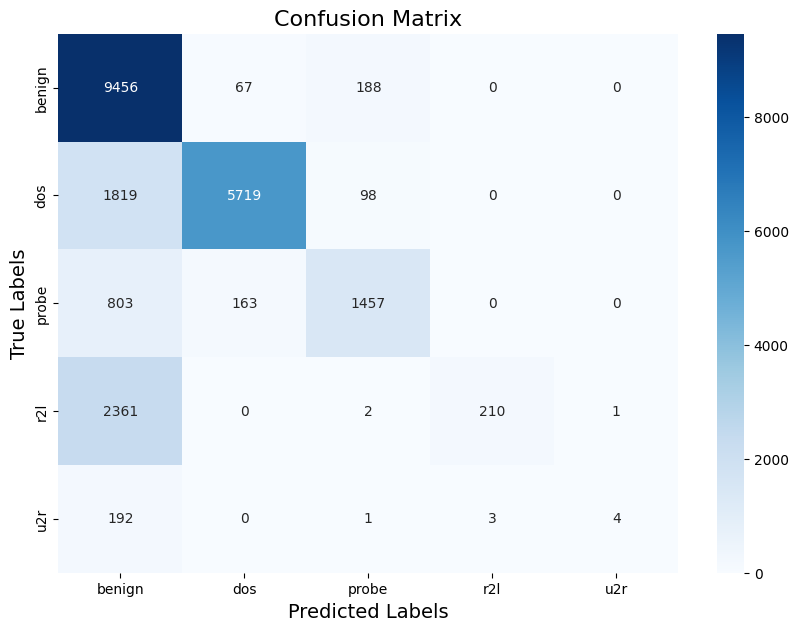

              precision    recall  f1-score   support

      benign       0.65      0.97      0.78      9711
         dos       0.96      0.75      0.84      7636
       probe       0.83      0.60      0.70      2423
         r2l       0.99      0.08      0.15      2574
         u2r       0.80      0.02      0.04       200

    accuracy                           0.75     22544
   macro avg       0.85      0.49      0.50     22544
weighted avg       0.81      0.75      0.71     22544

Confusion Matrix:
 [[9456   67  188    0    0]
 [1819 5719   98    0    0]
 [ 803  163 1457    0    0]
 [2361    0    2  210    1]
 [ 192    0    1    3    4]]
Zero-One Loss: 0.25275017743080197


In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import zero_one_loss
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Encode labels
label_encoder = LabelEncoder()
train_Y_encoded = label_encoder.fit_transform(train_Y)
test_Y_encoded = label_encoder.fit_transform(test_Y)

# First layer model for 'DoS' and 'Probe'
first_layer_model = RandomForestClassifier()
first_layer_model.fit(train_x, train_Y_encoded)

# First layer predictions on training data
first_layer_train_pred = first_layer_model.predict(train_x)

# Prepare data for the second layer
first_layer_train_pred_labels = label_encoder.inverse_transform(first_layer_train_pred)
train_y_labels = label_encoder.inverse_transform(train_Y_encoded)

# Filter the data for the second layer
second_layer_data = train_x[(first_layer_train_pred_labels == 'benign') | (first_layer_train_pred_labels == 'r2l') | (first_layer_train_pred_labels == 'u2r')]
second_layer_labels = train_Y_encoded[(first_layer_train_pred_labels == 'benign') | (first_layer_train_pred_labels == 'r2l') | (first_layer_train_pred_labels == 'u2r')]

# Train second layer model on filtered data
second_layer_model = RandomForestClassifier()
second_layer_model.fit(second_layer_data, second_layer_labels)

# Second layer predictions on training data
second_layer_train_pred = second_layer_model.predict(second_layer_data)

# Combine predictions on training data
combined_train_pred = first_layer_train_pred.copy()
combined_train_pred[(first_layer_train_pred_labels == 'benign') | (first_layer_train_pred_labels == 'r2l') | (first_layer_train_pred_labels == 'u2r')] = second_layer_train_pred

# First layer predictions on test data
first_layer_test_pred = first_layer_model.predict(test_x)

# Prepare data for second layer predictions on test data
first_layer_test_pred_labels = label_encoder.inverse_transform(first_layer_test_pred)
second_layer_test_data = test_x[(first_layer_test_pred_labels == 'benign') | (first_layer_test_pred_labels == 'r2l') | (first_layer_test_pred_labels == 'u2r')]

# Predict second layer on test data
second_layer_test_pred = second_layer_model.predict(second_layer_test_data)

# Combine predictions on test data
combined_test_pred = first_layer_test_pred.copy()
combined_test_pred[(first_layer_test_pred_labels == 'benign') | (first_layer_test_pred_labels == 'r2l') | (first_layer_test_pred_labels == 'u2r')] = second_layer_test_pred

# Convert predictions to original labels
final_pred_labels = label_encoder.inverse_transform(combined_test_pred)
final_test_labels = label_encoder.inverse_transform(test_Y_encoded)

# Class labels
class_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']

# Confusion matrix and error calculation
results = confusion_matrix(final_test_labels, final_pred_labels)
error = zero_one_loss(final_test_labels, final_pred_labels)

# Confusion matrix visualization
plt.figure(figsize=(10, 7))
sns.heatmap(results, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

# Classification report
print(classification_report(final_test_labels, final_pred_labels, target_names=class_labels))

# Results output
print("Confusion Matrix:\n", results)
print("Zero-One Loss:", error)


# 2. MLP
* 2-1. RUS (undersampling)
* 2-2. SMOTE (oversampling)
* 2-3. No Sampling

### 2-0. Grid Search로 MLP classifier의 최적의 파라미터 찾기

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 후보 정의
parameter_space = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

# MLPClassifier 생성
mlp = MLPClassifier(max_iter=500, random_state=42)

# GridSearchCV 설정
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)

# 학습
clf.fit(train_x, train_Y)

# 최적의 하이퍼파라미터 출력
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


### 2-1. MLP - RUS

[[8555  416  304  315  121]
 [1903 5368  195  109   61]
 [ 233  106 2045   23   16]
 [1535    2   68  421  548]
 [  25   59   34   29   53]]
              precision    recall  f1-score   support

      benign       0.70      0.88      0.78      9711
         dos       0.90      0.70      0.79      7636
       probe       0.77      0.84      0.81      2423
         r2l       0.47      0.16      0.24      2574
         u2r       0.07      0.27      0.11       200

    accuracy                           0.73     22544
   macro avg       0.58      0.57      0.54     22544
weighted avg       0.74      0.73      0.72     22544



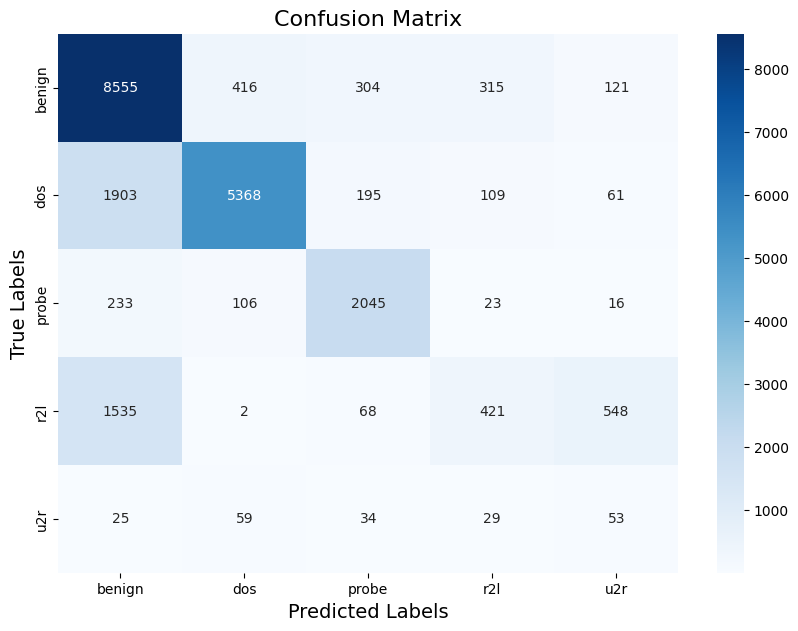

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# MLPClassifier 모델 생성 및 학습
# Create the MLPClassifier with specified parameters
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    max_iter=500,
    random_state=42,
    activation='relu',
    alpha=0.0001,
    learning_rate='constant',
    solver='adam'
)
mlp.fit(train_x_rus, train_Y_rus)

# 예측
y_pred = mlp.predict(test_x)

# 혼동 행렬 및 분류 리포트 출력
print(confusion_matrix(test_Y, y_pred))
print(classification_report(test_Y, y_pred))

# 클래스 레이블
class_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']

# 혼동 행렬 계산
cm = confusion_matrix(test_Y, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

error = zero_one_loss(test_Y, pred_y)
print("Zero-One Loss:", error)


### 2-2. MLP - SMOTE(upsampling)

[[9015  419  273    2    2]
 [1231 6240   95   70    0]
 [ 447  179 1796    0    1]
 [2321   20    9  170   54]
 [ 164    1    5   12   18]]
              precision    recall  f1-score   support

      benign       0.68      0.93      0.79      9711
         dos       0.91      0.82      0.86      7636
       probe       0.82      0.74      0.78      2423
         r2l       0.67      0.07      0.12      2574
         u2r       0.24      0.09      0.13       200

    accuracy                           0.76     22544
   macro avg       0.67      0.53      0.54     22544
weighted avg       0.77      0.76      0.73     22544



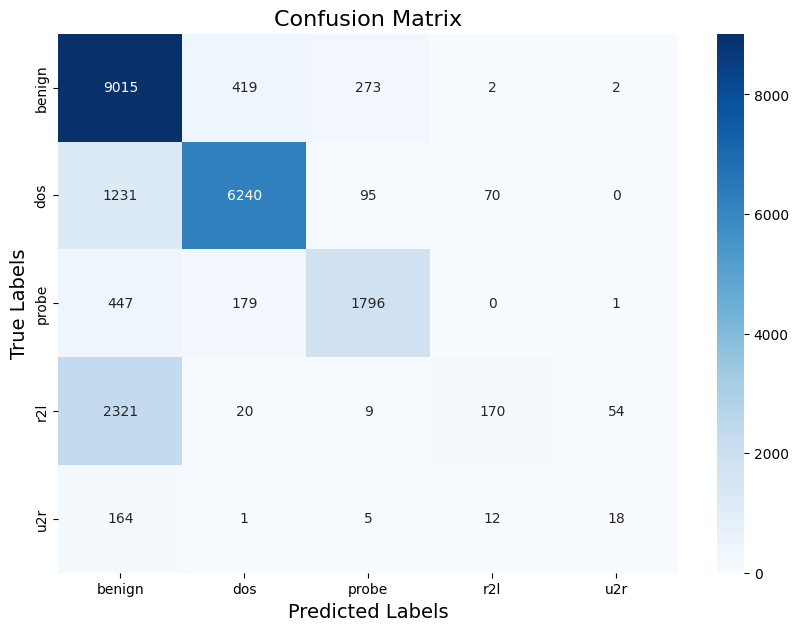

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=0)
train_x_sm, train_Y_sm= oversample.fit_resample(train_x, train_Y)

# MLPClassifier 모델 생성 및 학습
# Create the MLPClassifier with specified parameters
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    max_iter=500,
    random_state=42,
    activation='relu',
    alpha=0.0001,
    learning_rate='constant',
    solver='adam'
)
mlp.fit(train_x_sm, train_Y_sm)

# 예측
y_pred = mlp.predict(test_x)

# 혼동 행렬 및 분류 리포트 출력
print(confusion_matrix(test_Y, y_pred))
print(classification_report(test_Y, y_pred))

# 클래스 레이블
class_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']

# 혼동 행렬 계산
cm = confusion_matrix(test_Y, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

error = zero_one_loss(test_Y, pred_y)
print("Zero-One Loss:", error)

### 2-3. MLP - No sampling

[[9437   54  217    1    2]
 [1163 6265   80  128    0]
 [ 604  154 1658    7    0]
 [2361    0   13  198    2]
 [ 168    2   14    5   11]]
              precision    recall  f1-score   support

      benign       0.69      0.97      0.81      9711
         dos       0.97      0.82      0.89      7636
       probe       0.84      0.68      0.75      2423
         r2l       0.58      0.08      0.14      2574
         u2r       0.73      0.06      0.10       200

    accuracy                           0.78     22544
   macro avg       0.76      0.52      0.54     22544
weighted avg       0.79      0.78      0.74     22544



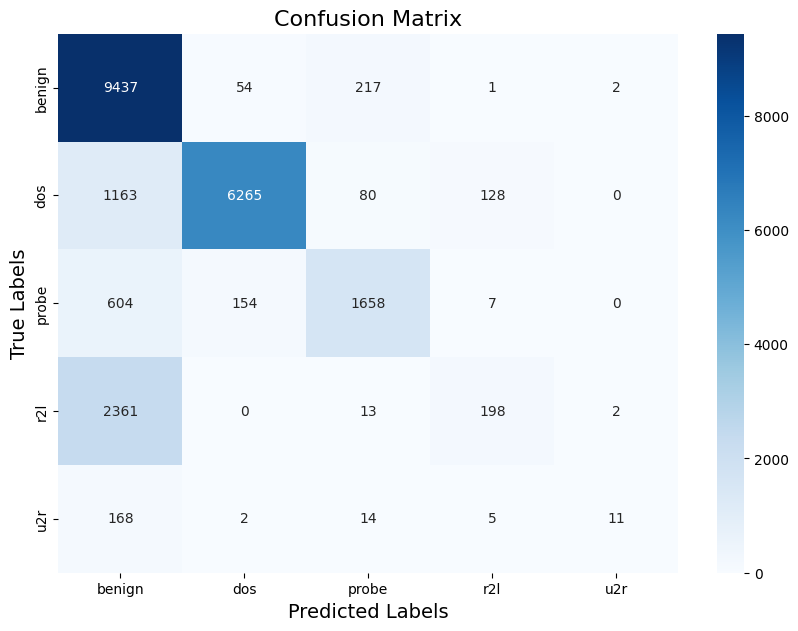

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# MLPClassifier 모델 생성 및 학습
# Create the MLPClassifier with specified parameters
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    max_iter=500,
    random_state=42,
    activation='relu',
    alpha=0.0001,
    learning_rate='constant',
    solver='adam'
)
mlp.fit(train_x, train_Y)

# 예측
y_pred = mlp.predict(test_x)

# 혼동 행렬 및 분류 리포트 출력
print(confusion_matrix(test_Y, y_pred))
print(classification_report(test_Y, y_pred))

# 클래스 레이블
class_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']

# 혼동 행렬 계산
cm = confusion_matrix(test_Y, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

error = zero_one_loss(test_Y, pred_y)
print("Zero-One Loss:", error)

### 3. DNN

**Data Nomalization**: Min–Max Scaler

**Proposed deep neural network model**
* Input layer:  Neurons number(118),  Activation function (None)
* Hidden layer #1 : Neurons number(Input * 2=236),  Activation function (ReLu)
* Hidden layer #2 : Neurons number(Input * 2=236),  Activation function (ReLu)
* Output layer: Neurons number(5),  Activation function (Softmax)

* Optimization algorithm: ADAM
* Loss function: Categorical cross-entropy

출처: Developing new deep‑learning model to enhance network intrusion classification
Evolving Systems (2022) 13:17–25 https://doi.org/10.1007/s12530-020-09364-z

In [34]:
#boolean -> 정수 변환
import pandas as pd
train_x.iloc[:, 37:118] = train_x.iloc[:, 37:118].astype(int)
test_x.iloc[:, 37:118] = test_x.iloc[:, 37:118].astype(int)

#DNN 안에 넣기 위해 output layer [0,0,0,0,1] 형태로 Y를 변환해줌.
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_Y_int = label_encoder.fit_transform(train_Y)
train_Y_class = to_categorical(train_Y_int, num_classes=5)
test_Y_int = label_encoder.fit_transform(test_Y)
test_Y_class = to_categorical(test_Y_int, num_classes=5)

## batch size: 16, epoch = 50, early stopping patience: 3

Epoch 1/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - categorical_accuracy: 0.9733 - loss: 0.0909 - val_categorical_accuracy: 0.9864 - val_loss: 0.0373
Epoch 2/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_accuracy: 0.9885 - loss: 0.0347 - val_categorical_accuracy: 0.9893 - val_loss: 0.0323
Epoch 3/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_accuracy: 0.9909 - loss: 0.0273 - val_categorical_accuracy: 0.9897 - val_loss: 0.0298
Epoch 4/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_accuracy: 0.9920 - loss: 0.0241 - val_categorical_accuracy: 0.9934 - val_loss: 0.0230
Epoch 5/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_accuracy: 0.9927 - loss: 0.0270 - val_categorical_accuracy: 0.9917 - val_loss: 0.0235
Epoch 6/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_accuracy: 0.9937 - loss: 0.0188 - val_categorical_accuracy: 0.9896 - val_loss: 0.0362
Epoch 7/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_a

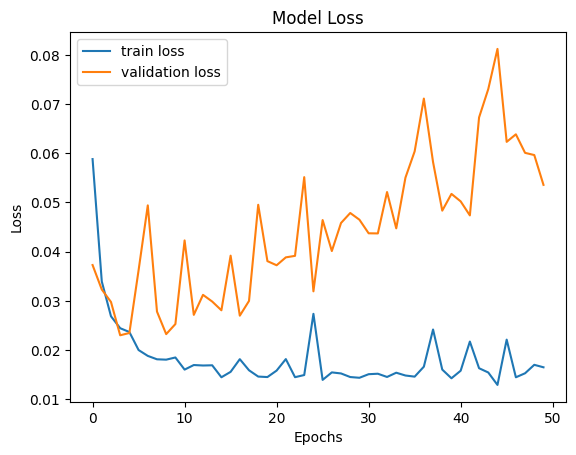

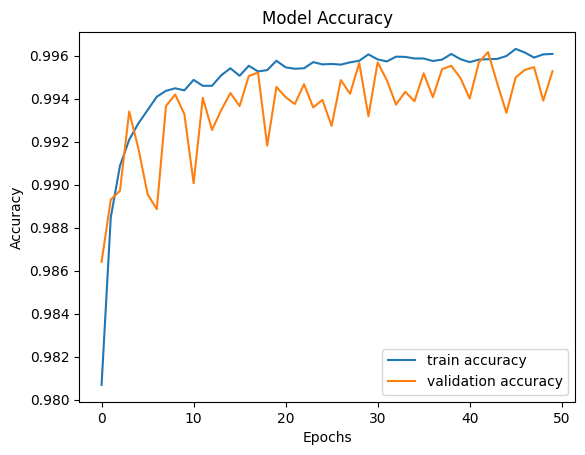

Epoch 1/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - categorical_accuracy: 0.9718 - loss: 0.0943 - val_categorical_accuracy: 0.9888 - val_loss: 0.0399
Epoch 2/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_accuracy: 0.9883 - loss: 0.0348 - val_categorical_accuracy: 0.9919 - val_loss: 0.0249
Epoch 3/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_accuracy: 0.9907 - loss: 0.0279 - val_categorical_accuracy: 0.9914 - val_loss: 0.0302
Epoch 4/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_accuracy: 0.9921 - loss: 0.0233 - val_categorical_accuracy: 0.9912 - val_loss: 0.0268
Epoch 5/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_accuracy: 0.9928 - loss: 0.0221 - val_categorical_accuracy: 0.9938 - val_loss: 0.0230
Epoch 6/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_accuracy: 0.9930 - loss: 0.0209 - val_categorical_accuracy: 0.9942 - val_loss: 0.0202
Epoch 7/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_a

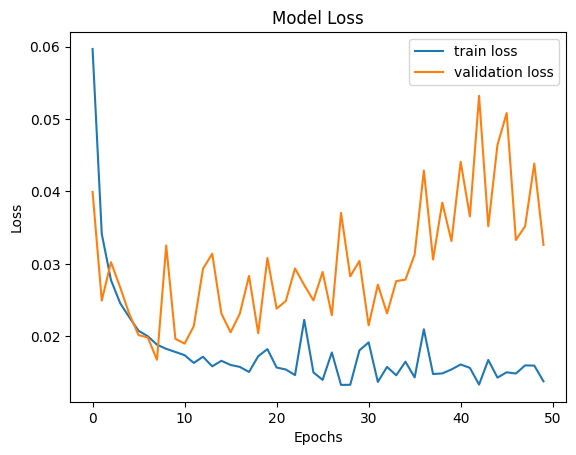

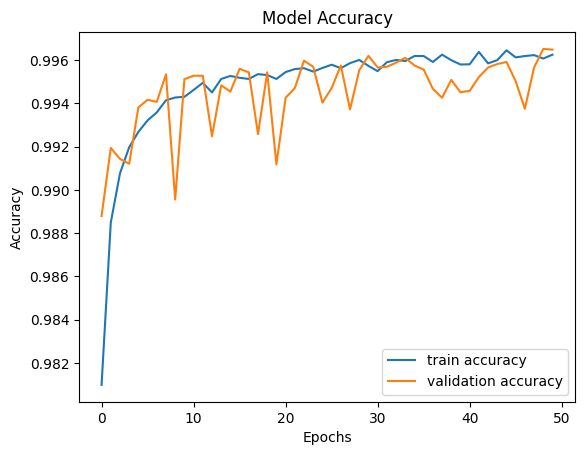

Epoch 1/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - categorical_accuracy: 0.9717 - loss: 0.0927 - val_categorical_accuracy: 0.9824 - val_loss: 0.0479
Epoch 2/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_accuracy: 0.9878 - loss: 0.0367 - val_categorical_accuracy: 0.9872 - val_loss: 0.0338
Epoch 3/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_accuracy: 0.9902 - loss: 0.0279 - val_categorical_accuracy: 0.9911 - val_loss: 0.0264
Epoch 4/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_accuracy: 0.9917 - loss: 0.0242 - val_categorical_accuracy: 0.9918 - val_loss: 0.0247
Epoch 5/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_accuracy: 0.9925 - loss: 0.0222 - val_categorical_accuracy: 0.9921 - val_loss: 0.0245
Epoch 6/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_accuracy: 0.9932 - loss: 0.0213 - val_categorical_accuracy: 0.9944 - val_loss: 0.0209
Epoch 7/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_a

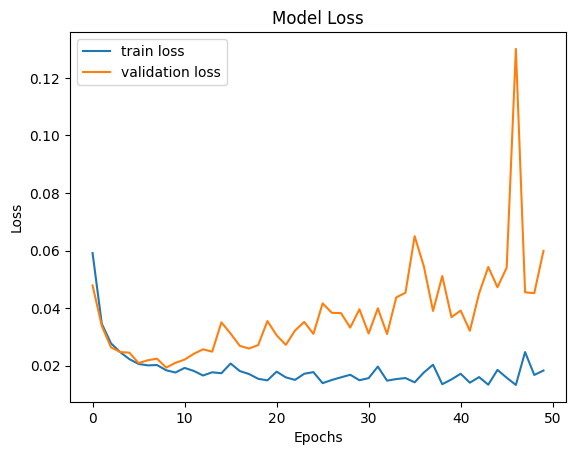

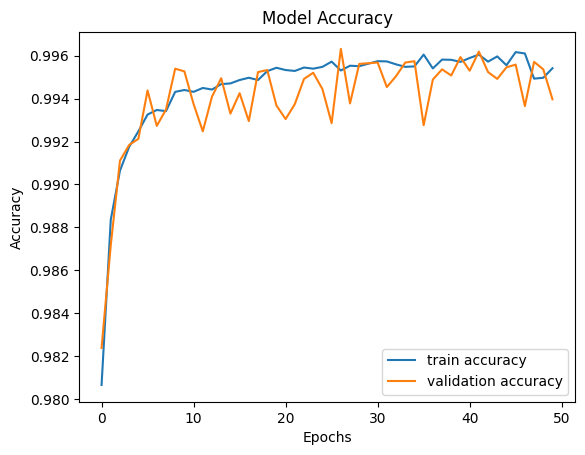

Epoch 1/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - categorical_accuracy: 0.9724 - loss: 0.0913 - val_categorical_accuracy: 0.9841 - val_loss: 0.0568
Epoch 2/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_accuracy: 0.9881 - loss: 0.0350 - val_categorical_accuracy: 0.9926 - val_loss: 0.0229
Epoch 3/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_accuracy: 0.9908 - loss: 0.0269 - val_categorical_accuracy: 0.9894 - val_loss: 0.0277
Epoch 4/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_accuracy: 0.9922 - loss: 0.0250 - val_categorical_accuracy: 0.9889 - val_loss: 0.0374
Epoch 5/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_accuracy: 0.9928 - loss: 0.0221 - val_categorical_accuracy: 0.9900 - val_loss: 0.0296
Epoch 6/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_accuracy: 0.9926 - loss: 0.0209 - val_categorical_accuracy: 0.9944 - val_loss: 0.0186
Epoch 7/50
5905/5905 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_a

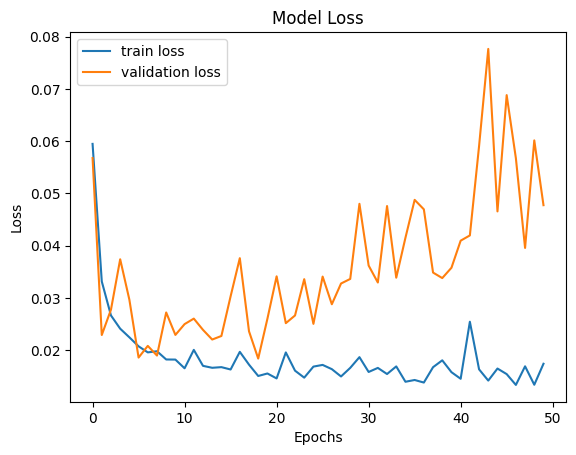

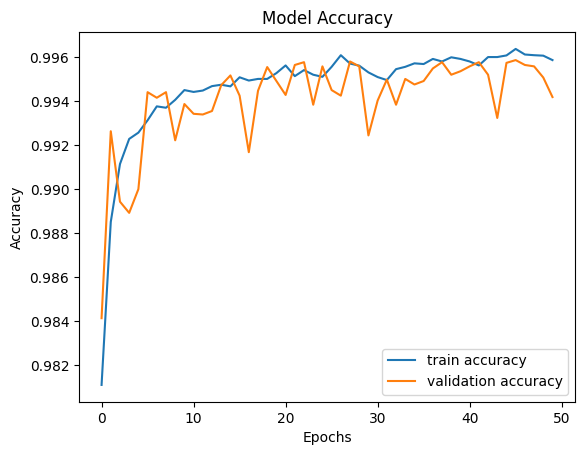

Cross-validation accuracies: [0.9952689409255981, 0.9964753985404968, 0.9939669370651245, 0.9941892027854919]
Mean accuracy: 0.9949751198291779
Standard deviation: 0.0009964016677059479
Epoch 1/50
6299/6299 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - categorical_accuracy: 0.9714 - loss: 0.0935 - val_categorical_accuracy: 0.9875 - val_loss: 0.0349
Epoch 2/50
6299/6299 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_accuracy: 0.9876 - loss: 0.0353 - val_categorical_accuracy: 0.9933 - val_loss: 0.0256
Epoch 3/50
6299/6299 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_accuracy: 0.9901 - loss: 0.0284 - val_categorical_accuracy: 0.9928 - val_loss: 0.0219
Epoch 4/50
6299/6299 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_accuracy: 0.9917 - loss: 0.0242 - val_categorical_accuracy: 0.9931 - val_loss: 0.0225
Epoch 5/50
6299/6299 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - categorical_accuracy: 0.9926 - loss: 0.0222 - val_categorical_accuracy: 0.9927 - val_loss: 0.0224
Epoch 6/50
6299/6299 ━━━━━━━━━━━━━━━━━━

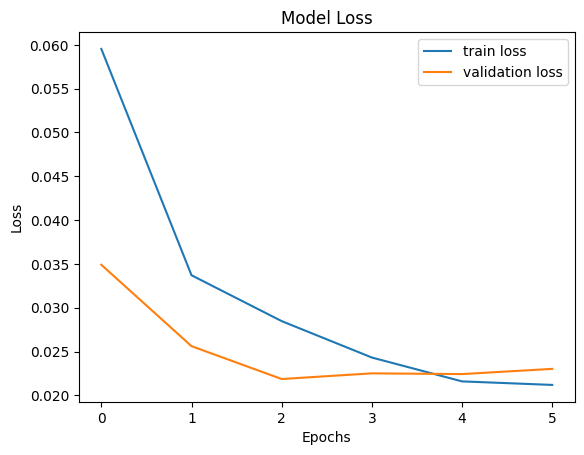

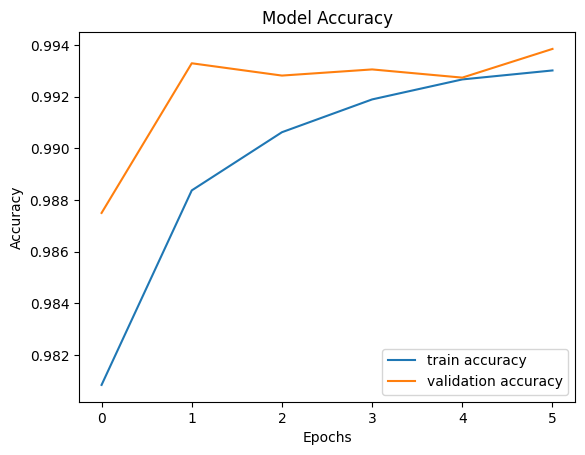

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
import matplotlib.pyplot as plt

# Experimenting with MinMaxScaler on the single 'duration' feature
from sklearn.preprocessing import MinMaxScaler

# Let's proceed with StandardScaler- Apply to all the numeric columns

min_max_scaler = MinMaxScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = \
    min_max_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = \
    min_max_scaler.transform(test_x[numeric_cols])

train_Y_bin = train_Y.apply(lambda x: 0 if x is 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x is 'benign' else 1)


# 모델 정의 함수
def create_model():
    model = Sequential()
    model.add(Dense(118, input_dim=118, activation=None))  # 입력층
    model.add(Dense(236, activation='relu'))  # 은닉층 #1
    model.add(Dense(236, activation='relu'))  # 은닉층 #2
    model.add(Dense(5, activation='softmax'))  # 출력층 (5개의 클래스)
    model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=[CategoricalAccuracy()])
    return model

# 4-fold 교차 검증 설정
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

# 교차 검증 결과 저장용 리스트
fold_accuracy = []

for train_idx, val_idx in kfold.split(train_x):
    # 데이터 분할
    train_X, val_X = train_x.iloc[train_idx], train_x.iloc[val_idx]
    train_y, val_y = train_Y_class[train_idx], train_Y_class[val_idx]

    # 모델 생성
    model = create_model()

    # 모델 학습
    history = model.fit(train_X, train_y, epochs=50, batch_size=16, validation_data=(val_X, val_y), verbose=1)

    # 모델 평가
    val_loss, val_accuracy = model.evaluate(val_X, val_y, verbose=1)
    fold_accuracy.append(val_accuracy)

    # 학습 손실 시각화
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # 학습 정확도 시각화
    plt.plot(history.history['categorical_accuracy'], label='train accuracy')
    plt.plot(history.history['val_categorical_accuracy'], label='validation accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# 교차 검증 결과 출력
print(f'Cross-validation accuracies: {fold_accuracy}')
print(f'Mean accuracy: {np.mean(fold_accuracy)}')
print(f'Standard deviation: {np.std(fold_accuracy)}')

# 조기 종료 콜백 정의
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 모델 학습 (전체 학습 데이터로)
model = create_model()
history = model.fit(train_x, train_Y_class, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# 모델 예측 (테스트 데이터로)
test_loss, test_accuracy = model.evaluate(test_x, test_Y_class, verbose=1)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

# 학습 손실 시각화
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 학습 정확도 시각화
plt.plot(history.history['categorical_accuracy'], label='train accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

      benign       0.67      0.93      0.78      9711
         dos       0.90      0.80      0.85      7636
       probe       0.81      0.65      0.72      2423
         r2l       0.91      0.11      0.19      2574
         u2r       0.90      0.04      0.09       200

    accuracy                           0.75     22544
   macro avg       0.84      0.51      0.52     22544
weighted avg       0.79      0.75      0.72     22544



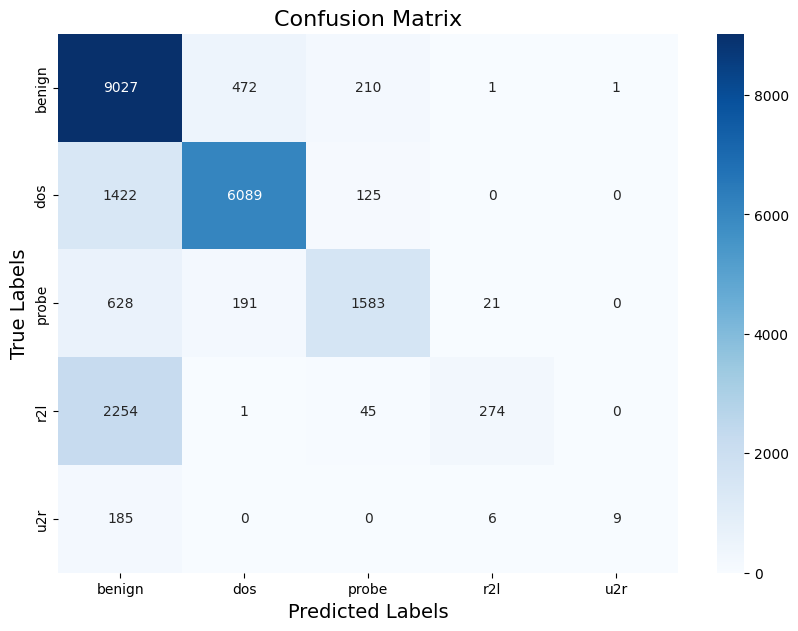

Confusion Matrix:
 [[9027  472  210    1    1]
 [1422 6089  125    0    0]
 [ 628  191 1583   21    0]
 [2254    1   45  274    0]
 [ 185    0    0    6    9]]
Zero-One Loss: 0.2467175301632364


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report, confusion_matrix
# 예측
pred_Y_class = model.predict(test_x)
pred_Y_int = np.argmax(pred_Y_class, axis=1)

# 원래의 문자열 레이블로 변환
pred_Y = label_encoder.inverse_transform(pred_Y_int)

# 클래스 레이블을 정의합니다
class_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']

# 혼동 행렬 및 에러 계산
results = confusion_matrix(test_Y, pred_Y)
error = zero_one_loss(test_Y, pred_Y)

# 혼동 행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(results, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
print(classification_report(test_Y, pred_Y, target_names=class_labels))

# 축 설명 추가
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

plt.show()

# 결과 출력
print("Confusion Matrix:\n", results)
print("Zero-One Loss:", error)

## batch size : 11, epoch =30, early_stopping patience: 8

Epoch 1/30
8589/8589 [==============================] - 30s 3ms/step - loss: 0.0600 - categorical_accuracy: 0.9805 - val_loss: 0.0321 - val_categorical_accuracy: 0.9877
Epoch 2/30
8589/8589 [==============================] - 29s 3ms/step - loss: 0.0353 - categorical_accuracy: 0.9881 - val_loss: 0.0342 - val_categorical_accuracy: 0.9877
Epoch 3/30
8589/8589 [==============================] - 29s 3ms/step - loss: 0.0289 - categorical_accuracy: 0.9903 - val_loss: 0.0451 - val_categorical_accuracy: 0.9838
Epoch 4/30
8589/8589 [==============================] - 29s 3ms/step - loss: 0.0258 - categorical_accuracy: 0.9915 - val_loss: 0.0220 - val_categorical_accuracy: 0.9923
Epoch 5/30
8589/8589 [==============================] - 29s 3ms/step - loss: 0.0262 - categorical_accuracy: 0.9923 - val_loss: 0.0311 - val_categorical_accuracy: 0.9918
Epoch 6/30
8589/8589 [==============================] - 29s 3ms/step - loss: 0.0227 - categorical_accuracy: 0.9926 - val_loss: 0.0340 - val_categorical_acc

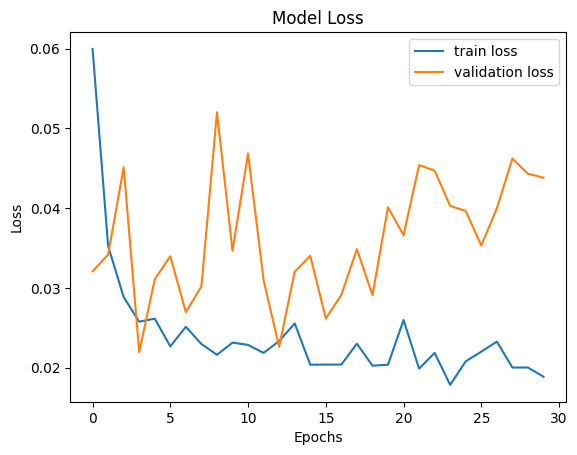

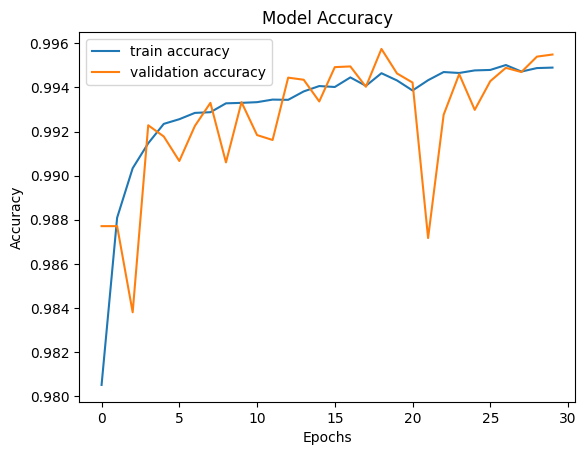

Epoch 1/30
8590/8590 [==============================] - 32s 4ms/step - loss: 0.0618 - categorical_accuracy: 0.9795 - val_loss: 0.0413 - val_categorical_accuracy: 0.9820
Epoch 2/30
8590/8590 [==============================] - 30s 4ms/step - loss: 0.0367 - categorical_accuracy: 0.9872 - val_loss: 0.0426 - val_categorical_accuracy: 0.9871
Epoch 3/30
8590/8590 [==============================] - 30s 4ms/step - loss: 0.0288 - categorical_accuracy: 0.9900 - val_loss: 0.0292 - val_categorical_accuracy: 0.9906
Epoch 4/30
8590/8590 [==============================] - 30s 4ms/step - loss: 0.0269 - categorical_accuracy: 0.9912 - val_loss: 0.0241 - val_categorical_accuracy: 0.9922
Epoch 5/30
8590/8590 [==============================] - 30s 3ms/step - loss: 0.0252 - categorical_accuracy: 0.9922 - val_loss: 0.0295 - val_categorical_accuracy: 0.9920
Epoch 6/30
8590/8590 [==============================] - 30s 3ms/step - loss: 0.0236 - categorical_accuracy: 0.9923 - val_loss: 0.0274 - val_categorical_acc

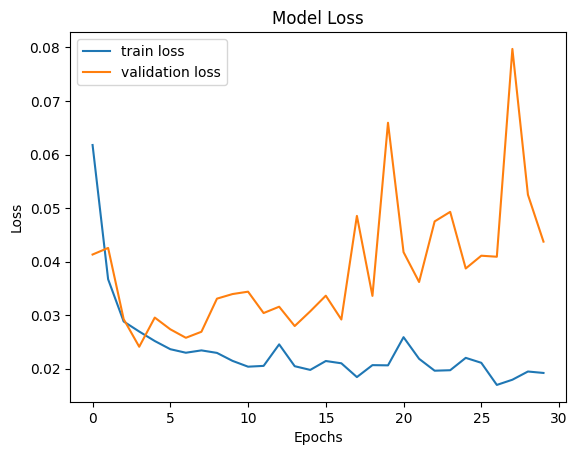

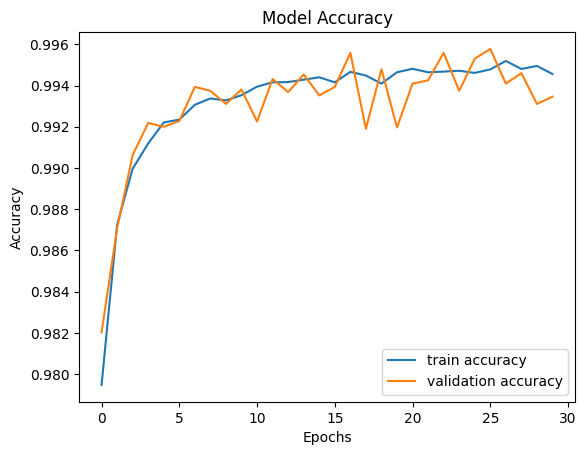

Epoch 1/30
8590/8590 [==============================] - 33s 4ms/step - loss: 0.0609 - categorical_accuracy: 0.9803 - val_loss: 0.0374 - val_categorical_accuracy: 0.9870
Epoch 2/30
8590/8590 [==============================] - 30s 4ms/step - loss: 0.0363 - categorical_accuracy: 0.9879 - val_loss: 0.0413 - val_categorical_accuracy: 0.9871
Epoch 3/30
8590/8590 [==============================] - 30s 4ms/step - loss: 0.0297 - categorical_accuracy: 0.9904 - val_loss: 0.0204 - val_categorical_accuracy: 0.9932
Epoch 4/30
8590/8590 [==============================] - 30s 3ms/step - loss: 0.0260 - categorical_accuracy: 0.9918 - val_loss: 0.0220 - val_categorical_accuracy: 0.9929
Epoch 5/30
8590/8590 [==============================] - 30s 4ms/step - loss: 0.0235 - categorical_accuracy: 0.9926 - val_loss: 0.0283 - val_categorical_accuracy: 0.9928
Epoch 6/30
8590/8590 [==============================] - 30s 4ms/step - loss: 0.0233 - categorical_accuracy: 0.9924 - val_loss: 0.0241 - val_categorical_acc

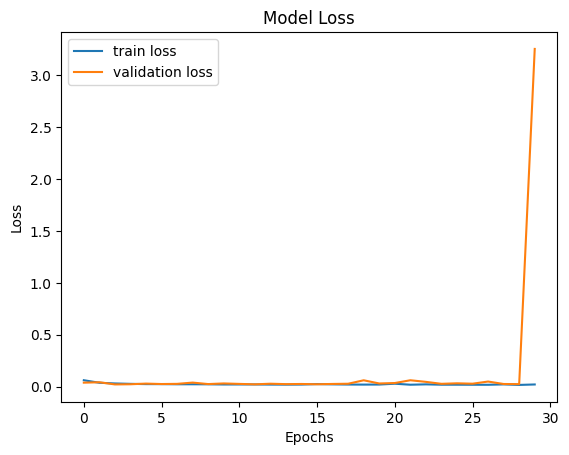

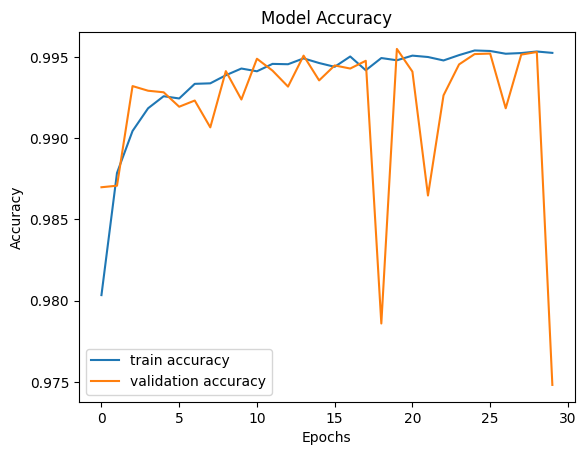

Epoch 1/30
8590/8590 [==============================] - 30s 3ms/step - loss: 0.0605 - categorical_accuracy: 0.9799 - val_loss: 0.0384 - val_categorical_accuracy: 0.9861
Epoch 2/30
8590/8590 [==============================] - 29s 3ms/step - loss: 0.0355 - categorical_accuracy: 0.9877 - val_loss: 0.0283 - val_categorical_accuracy: 0.9908
Epoch 3/30
8590/8590 [==============================] - 28s 3ms/step - loss: 0.0300 - categorical_accuracy: 0.9902 - val_loss: 0.0285 - val_categorical_accuracy: 0.9912
Epoch 4/30
8590/8590 [==============================] - 28s 3ms/step - loss: 0.0273 - categorical_accuracy: 0.9910 - val_loss: 0.0232 - val_categorical_accuracy: 0.9931
Epoch 5/30
8590/8590 [==============================] - 28s 3ms/step - loss: 0.0260 - categorical_accuracy: 0.9914 - val_loss: 0.0245 - val_categorical_accuracy: 0.9930
Epoch 6/30
8590/8590 [==============================] - 28s 3ms/step - loss: 0.0240 - categorical_accuracy: 0.9925 - val_loss: 0.0211 - val_categorical_acc

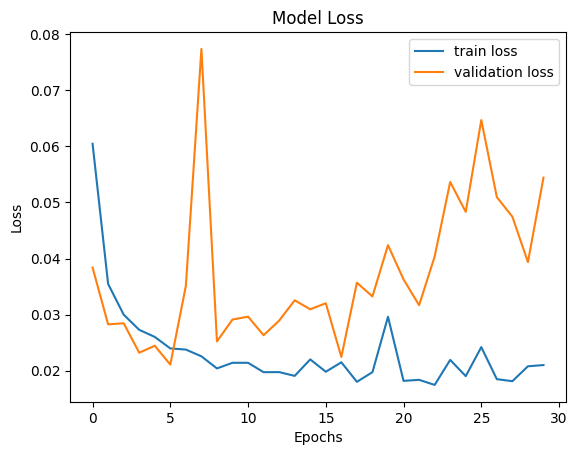

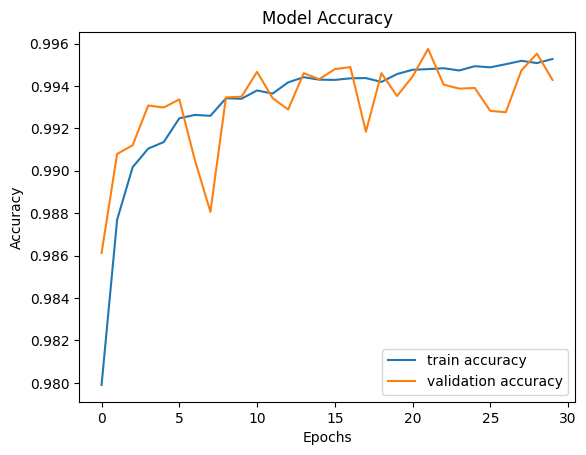

Cross-validation accuracies: [0.9954912066459656, 0.9934588670730591, 0.9748197793960571, 0.994284451007843]
Mean accuracy: 0.9895135760307312
Standard deviation: 0.008514198388122788
Epoch 1/30
8589/8589 [==============================] - 28s 3ms/step - loss: 0.0594 - categorical_accuracy: 0.9807 - val_loss: 0.0350 - val_categorical_accuracy: 0.9870
Epoch 2/30
8589/8589 [==============================] - 26s 3ms/step - loss: 0.0356 - categorical_accuracy: 0.9883 - val_loss: 0.0275 - val_categorical_accuracy: 0.9906
Epoch 3/30
8589/8589 [==============================] - 26s 3ms/step - loss: 0.0292 - categorical_accuracy: 0.9901 - val_loss: 0.0332 - val_categorical_accuracy: 0.9896
Epoch 4/30
8589/8589 [==============================] - 26s 3ms/step - loss: 0.0260 - categorical_accuracy: 0.9913 - val_loss: 0.0293 - val_categorical_accuracy: 0.9908
Epoch 5/30
8589/8589 [==============================] - 27s 3ms/step - loss: 0.0249 - categorical_accuracy: 0.9918 - val_loss: 0.0215 - val_

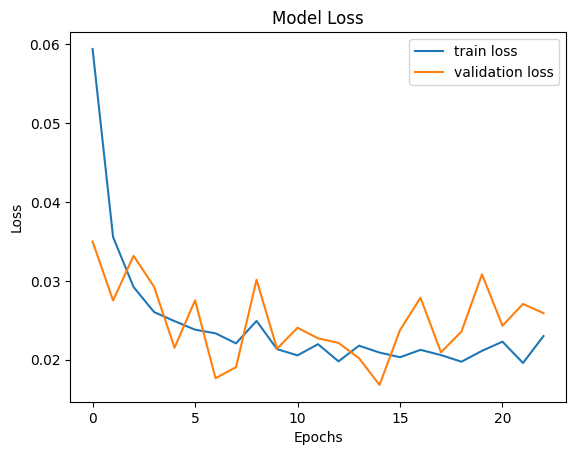

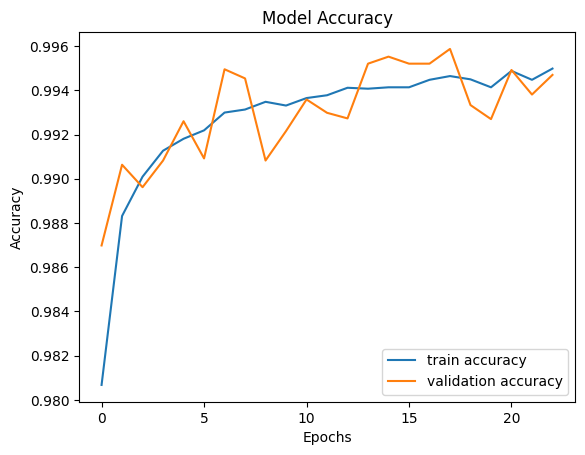

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
import matplotlib.pyplot as plt

# Experimenting with MinMaxScaler on the single 'duration' feature
from sklearn.preprocessing import MinMaxScaler

# Let's proceed with StandardScaler- Apply to all the numeric columns

min_max_scaler = MinMaxScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = \
    min_max_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = \
    min_max_scaler.transform(test_x[numeric_cols])

train_Y_bin = train_Y.apply(lambda x: 0 if x is 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x is 'benign' else 1)


# 모델 정의 함수
def create_model():
    model = Sequential()
    model.add(Dense(118, input_dim=118, activation=None))  # 입력층
    model.add(Dense(236, activation='relu'))  # 은닉층 #1
    model.add(Dense(236, activation='relu'))  # 은닉층 #2
    model.add(Dense(5, activation='softmax'))  # 출력층 (5개의 클래스)
    model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=[CategoricalAccuracy()])
    return model

# 4-fold 교차 검증 설정
kfold = KFold(n_splits=4, shuffle=True, random_state=14)

# 교차 검증 결과 저장용 리스트
fold_accuracy = []

for train_idx, val_idx in kfold.split(train_x):
    # 데이터 분할
    train_X, val_X = train_x.iloc[train_idx], train_x.iloc[val_idx]
    train_y, val_y = train_Y_class[train_idx], train_Y_class[val_idx]

    # 모델 생성
    model = create_model()

    # 모델 학습
    history = model.fit(train_X, train_y, epochs=30, batch_size=11, validation_data=(val_X, val_y), verbose=1)

    # 모델 평가
    val_loss, val_accuracy = model.evaluate(val_X, val_y, verbose=1)
    fold_accuracy.append(val_accuracy)

    # 학습 손실 시각화
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # 학습 정확도 시각화
    plt.plot(history.history['categorical_accuracy'], label='train accuracy')
    plt.plot(history.history['val_categorical_accuracy'], label='validation accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# 교차 검증 결과 출력
print(f'Cross-validation accuracies: {fold_accuracy}')
print(f'Mean accuracy: {np.mean(fold_accuracy)}')
print(f'Standard deviation: {np.std(fold_accuracy)}')

# 조기 종료 콜백 정의
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8  , restore_best_weights=True)

# 모델 학습 (전체 학습 데이터로)
model = create_model()
history = model.fit(train_x, train_Y_class, epochs=30, batch_size=11, validation_split=0.25, callbacks=[early_stopping], verbose=1)

# 모델 예측 (테스트 데이터로)
test_loss, test_accuracy = model.evaluate(test_x, test_Y_class, verbose=1)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

# 학습 손실 시각화
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 학습 정확도 시각화
plt.plot(history.history['categorical_accuracy'], label='train accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


705/705 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

      benign       0.67      0.92      0.78      9711
         dos       0.96      0.80      0.87      7636
       probe       0.68      0.64      0.66      2423
         r2l       0.75      0.16      0.27      2574
         u2r       0.54      0.07      0.13       200

    accuracy                           0.76     22544
   macro avg       0.72      0.52      0.54     22544
weighted avg       0.78      0.76      0.73     22544



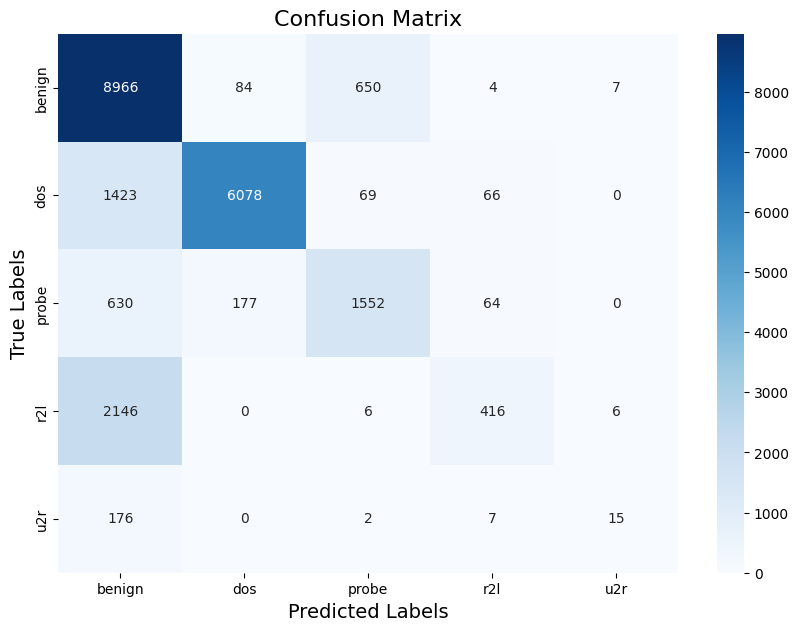

Confusion Matrix:
 [[8966   84  650    4    7]
 [1423 6078   69   66    0]
 [ 630  177 1552   64    0]
 [2146    0    6  416    6]
 [ 176    0    2    7   15]]
Zero-One Loss: 0.24472143364088006


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report, confusion_matrix
# 예측
pred_Y_class = model.predict(test_x)
pred_Y_int = np.argmax(pred_Y_class, axis=1)

# 원래의 문자열 레이블로 변환
pred_Y = label_encoder.inverse_transform(pred_Y_int)

# 클래스 레이블을 정의합니다
class_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']

# 혼동 행렬 및 에러 계산
results = confusion_matrix(test_Y, pred_Y)
error = zero_one_loss(test_Y, pred_Y)

# 혼동 행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(results, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
print(classification_report(test_Y, pred_Y, target_names=class_labels))

# 축 설명 추가
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

plt.show()

# 결과 출력
print("Confusion Matrix:\n", results)
print("Zero-One Loss:", error)

## batch size : 64, epoch =50, early_stopping patience:8

Epoch 1/50
1477/1477 [==============================] - 7s 4ms/step - loss: 0.0651 - categorical_accuracy: 0.9792 - val_loss: 0.0352 - val_categorical_accuracy: 0.9865
Epoch 2/50
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0323 - categorical_accuracy: 0.9887 - val_loss: 0.0334 - val_categorical_accuracy: 0.9876
Epoch 3/50
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0250 - categorical_accuracy: 0.9914 - val_loss: 0.0260 - val_categorical_accuracy: 0.9923
Epoch 4/50
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0211 - categorical_accuracy: 0.9928 - val_loss: 0.0198 - val_categorical_accuracy: 0.9932
Epoch 5/50
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0177 - categorical_accuracy: 0.9938 - val_loss: 0.0741 - val_categorical_accuracy: 0.9865
Epoch 6/50
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0175 - categorical_accuracy: 0.9939 - val_loss: 0.0172 - val_categorical_accuracy:

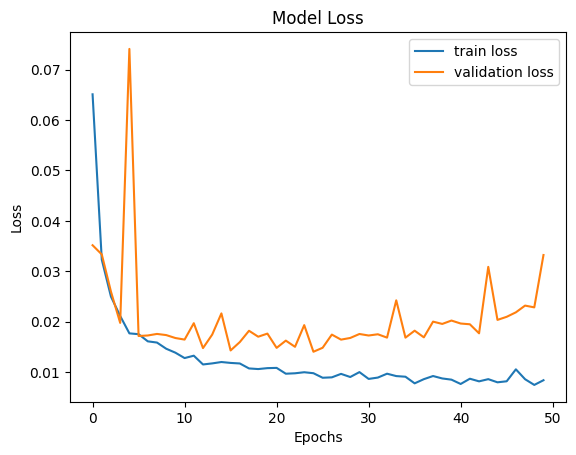

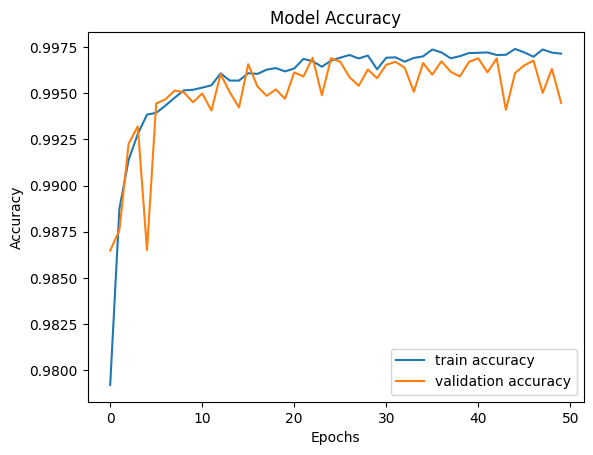

Epoch 1/50
1477/1477 [==============================] - 7s 4ms/step - loss: 0.0684 - categorical_accuracy: 0.9787 - val_loss: 0.0346 - val_categorical_accuracy: 0.9883
Epoch 2/50
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0315 - categorical_accuracy: 0.9889 - val_loss: 0.0320 - val_categorical_accuracy: 0.9877
Epoch 3/50
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0245 - categorical_accuracy: 0.9911 - val_loss: 0.0270 - val_categorical_accuracy: 0.9907
Epoch 4/50
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0207 - categorical_accuracy: 0.9925 - val_loss: 0.0234 - val_categorical_accuracy: 0.9929
Epoch 5/50
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0186 - categorical_accuracy: 0.9934 - val_loss: 0.0173 - val_categorical_accuracy: 0.9955
Epoch 6/50
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0176 - categorical_accuracy: 0.9936 - val_loss: 0.0210 - val_categorical_accuracy:

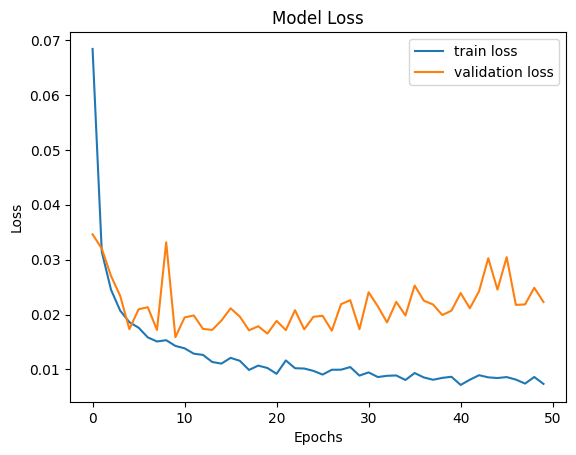

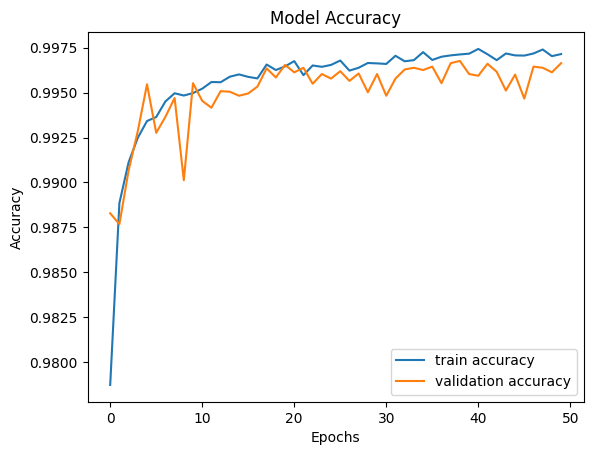

Epoch 1/50
1477/1477 [==============================] - 7s 4ms/step - loss: 0.0653 - categorical_accuracy: 0.9792 - val_loss: 0.0386 - val_categorical_accuracy: 0.9858
Epoch 2/50
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0313 - categorical_accuracy: 0.9894 - val_loss: 0.0294 - val_categorical_accuracy: 0.9891
Epoch 3/50
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0242 - categorical_accuracy: 0.9916 - val_loss: 0.0367 - val_categorical_accuracy: 0.9857
Epoch 4/50
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0201 - categorical_accuracy: 0.9930 - val_loss: 0.0196 - val_categorical_accuracy: 0.9930
Epoch 5/50
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0177 - categorical_accuracy: 0.9938 - val_loss: 0.0196 - val_categorical_accuracy: 0.9925
Epoch 6/50
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0167 - categorical_accuracy: 0.9942 - val_loss: 0.0205 - val_categorical_accuracy:

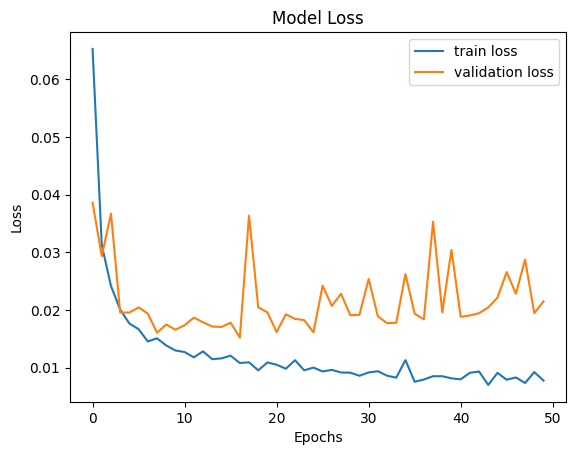

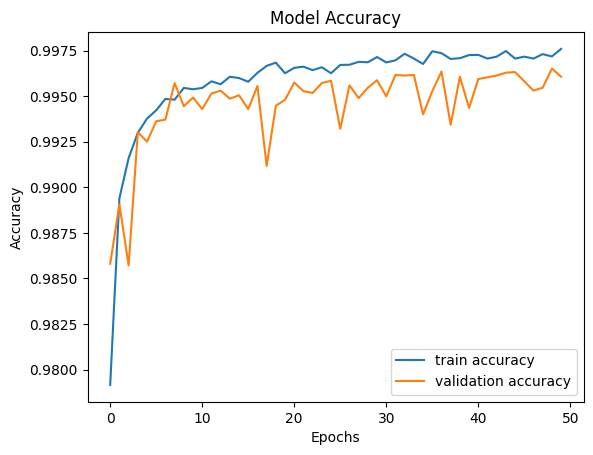

Epoch 1/50
1477/1477 [==============================] - 7s 4ms/step - loss: 0.0663 - categorical_accuracy: 0.9794 - val_loss: 0.0385 - val_categorical_accuracy: 0.9885
Epoch 2/50
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0333 - categorical_accuracy: 0.9881 - val_loss: 0.0297 - val_categorical_accuracy: 0.9875
Epoch 3/50
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0254 - categorical_accuracy: 0.9909 - val_loss: 0.0288 - val_categorical_accuracy: 0.9890
Epoch 4/50
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0213 - categorical_accuracy: 0.9924 - val_loss: 0.0211 - val_categorical_accuracy: 0.9932
Epoch 5/50
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0197 - categorical_accuracy: 0.9932 - val_loss: 0.0177 - val_categorical_accuracy: 0.9943
Epoch 6/50
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0173 - categorical_accuracy: 0.9941 - val_loss: 0.0160 - val_categorical_accuracy:

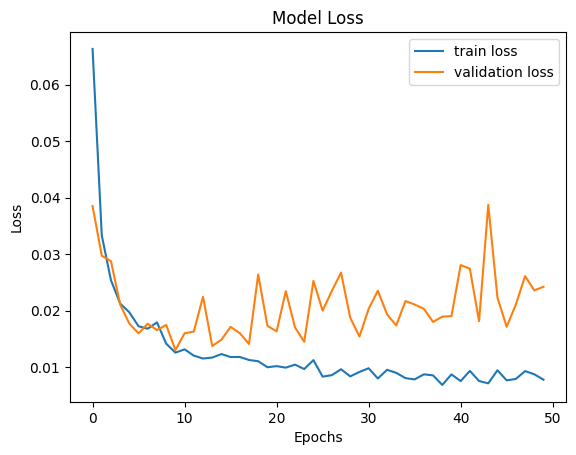

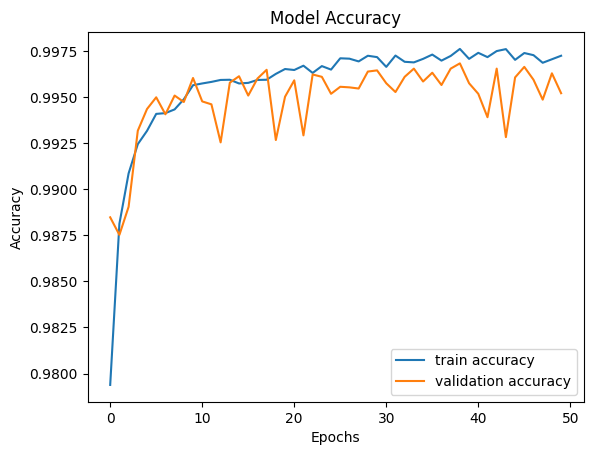

Cross-validation accuracies: [0.9944751262664795, 0.9966341853141785, 0.9960626363754272, 0.995205283164978]
Mean accuracy: 0.9955943077802658
Standard deviation: 0.0008222810302267397
Epoch 1/50
1477/1477 [==============================] - 7s 4ms/step - loss: 0.0670 - categorical_accuracy: 0.9789 - val_loss: 0.0416 - val_categorical_accuracy: 0.9851
Epoch 2/50
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0341 - categorical_accuracy: 0.9881 - val_loss: 0.0261 - val_categorical_accuracy: 0.9912
Epoch 3/50
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0256 - categorical_accuracy: 0.9910 - val_loss: 0.0245 - val_categorical_accuracy: 0.9919
Epoch 4/50
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0220 - categorical_accuracy: 0.9921 - val_loss: 0.0218 - val_categorical_accuracy: 0.9918
Epoch 5/50
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0193 - categorical_accuracy: 0.9931 - val_loss: 0.0165 - val_cate

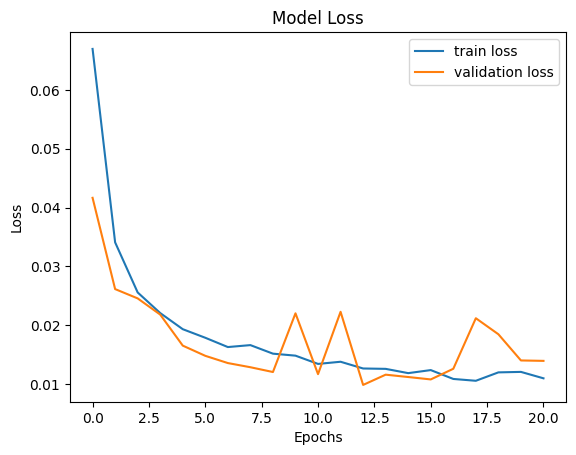

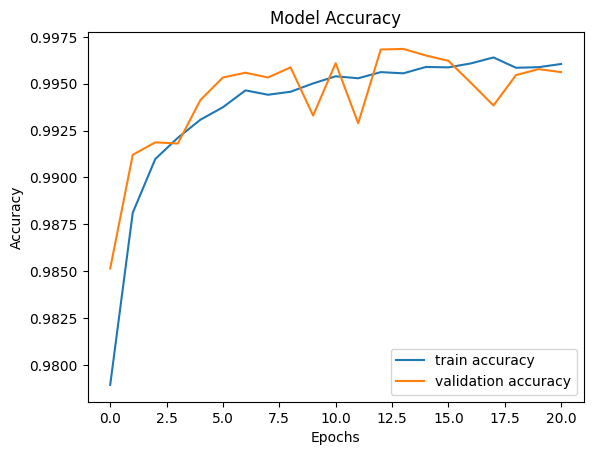

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
import matplotlib.pyplot as plt

# Experimenting with MinMaxScaler on the single 'duration' feature
from sklearn.preprocessing import MinMaxScaler

# Let's proceed with StandardScaler- Apply to all the numeric columns

min_max_scaler = MinMaxScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = \
    min_max_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = \
    min_max_scaler.transform(test_x[numeric_cols])

train_Y_bin = train_Y.apply(lambda x: 0 if x is 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x is 'benign' else 1)


# 모델 정의 함수
def create_model():
    model = Sequential()
    model.add(Dense(118, input_dim=118, activation=None))  # 입력층
    model.add(Dense(236, activation='relu'))  # 은닉층 #1
    model.add(Dense(236, activation='relu'))  # 은닉층 #2
    model.add(Dense(5, activation='softmax'))  # 출력층 (5개의 클래스)
    model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=[CategoricalAccuracy()])
    return model

# 4-fold 교차 검증 설정
kfold = KFold(n_splits=4, shuffle=True, random_state=14)

# 교차 검증 결과 저장용 리스트
fold_accuracy = []

for train_idx, val_idx in kfold.split(train_x):
    # 데이터 분할
    train_X, val_X = train_x.iloc[train_idx], train_x.iloc[val_idx]
    train_y, val_y = train_Y_class[train_idx], train_Y_class[val_idx]

    # 모델 생성
    model = create_model()

    # 모델 학습
    history = model.fit(train_X, train_y, epochs=50, batch_size=64, validation_data=(val_X, val_y), verbose=1)

    # 모델 평가
    val_loss, val_accuracy = model.evaluate(val_X, val_y, verbose=1)
    fold_accuracy.append(val_accuracy)

    # 학습 손실 시각화
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # 학습 정확도 시각화
    plt.plot(history.history['categorical_accuracy'], label='train accuracy')
    plt.plot(history.history['val_categorical_accuracy'], label='validation accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# 교차 검증 결과 출력
print(f'Cross-validation accuracies: {fold_accuracy}')
print(f'Mean accuracy: {np.mean(fold_accuracy)}')
print(f'Standard deviation: {np.std(fold_accuracy)}')

# 조기 종료 콜백 정의
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# 모델 학습 (전체 학습 데이터로)
model = create_model()
history = model.fit(train_x, train_Y_class, epochs=50, batch_size=64, validation_split=0.25, callbacks=[early_stopping], verbose=1)

# 모델 예측 (테스트 데이터로)
test_loss, test_accuracy = model.evaluate(test_x, test_Y_class, verbose=1)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

# 학습 손실 시각화
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 학습 정확도 시각화
plt.plot(history.history['categorical_accuracy'], label='train accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


705/705 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

      benign       0.67      0.96      0.79      9711
         dos       0.96      0.80      0.87      7636
       probe       0.83      0.62      0.71      2423
         r2l       0.76      0.09      0.17      2574
         u2r       0.65      0.09      0.15       200

    accuracy                           0.76     22544
   macro avg       0.78      0.51      0.54     22544
weighted avg       0.79      0.76      0.73     22544



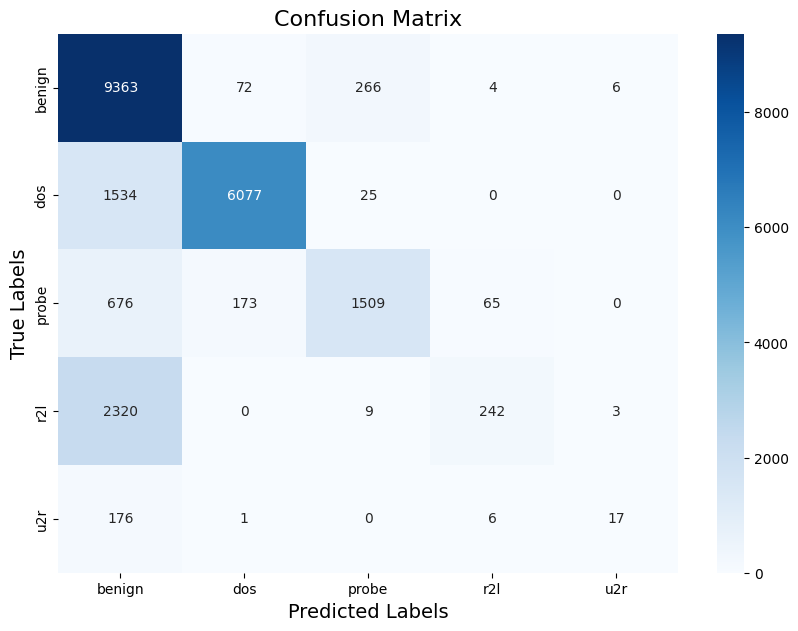

Confusion Matrix:
 [[9363   72  266    4    6]
 [1534 6077   25    0    0]
 [ 676  173 1509   65    0]
 [2320    0    9  242    3]
 [ 176    1    0    6   17]]
Zero-One Loss: 0.23669268985095815


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report, confusion_matrix
# 예측
pred_Y_class = model.predict(test_x)
pred_Y_int = np.argmax(pred_Y_class, axis=1)

# 원래의 문자열 레이블로 변환
pred_Y = label_encoder.inverse_transform(pred_Y_int)

# 클래스 레이블을 정의합니다
class_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']

# 혼동 행렬 및 에러 계산
results = confusion_matrix(test_Y, pred_Y)
error = zero_one_loss(test_Y, pred_Y)

# 혼동 행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(results, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
print(classification_report(test_Y, pred_Y, target_names=class_labels))

# 축 설명 추가
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

plt.show()

# 결과 출력
print("Confusion Matrix:\n", results)
print("Zero-One Loss:", error)

## batch size : 32 epoch =30 No Early Stopping

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 118)               14042     
                                                                 
 dense_13 (Dense)            (None, 236)               28084     
                                                                 
 dense_14 (Dense)            (None, 236)               55932     
                                                                 
 dense_15 (Dense)            (None, 5)                 1185      
                                                                 
Total params: 99243 (387.67 KB)
Trainable params: 99243 (387.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
3150/3150 [==============================] - 12s 3ms/step - loss: 0.0591 - categorical_accuracy: 0.9806 - val_loss: 0.0302 - val_categori

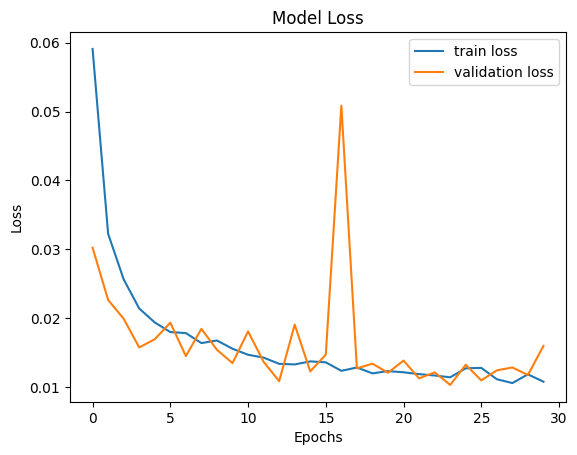

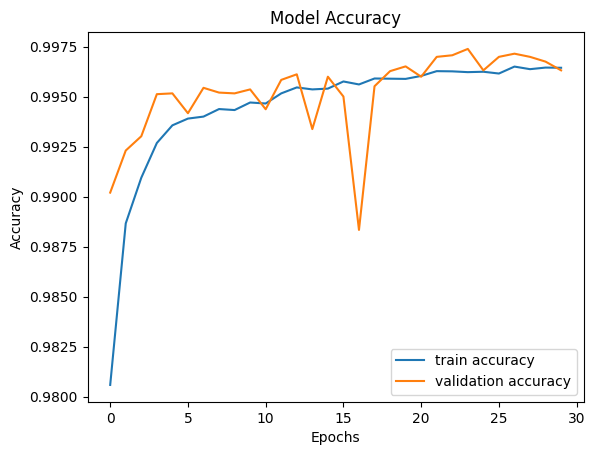

In [ ]:
#41개 feature->118개??

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
import matplotlib.pyplot as plt

# Experimenting with MinMaxScaler on the single 'duration' feature
from sklearn.preprocessing import MinMaxScaler

# Let's proceed with StandardScaler- Apply to all the numeric columns

min_max_scaler = MinMaxScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = \
    min_max_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = \
    min_max_scaler.transform(test_x[numeric_cols])

train_Y_bin = train_Y.apply(lambda x: 0 if x is 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x is 'benign' else 1)

# 모델 정의
model = Sequential()

# 입력층
model.add(Dense(118, input_dim=118, activation=None))

# 은닉층 #1
model.add(Dense(236, activation='relu'))

# 은닉층 #2
model.add(Dense(236, activation='relu'))

# 출력층
model.add(Dense(5, activation='softmax'))

# 모델 컴파일
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=[CategoricalAccuracy()])

# 모델 요약 출력
model.summary()

# 모델 학습
history = model.fit(train_x,train_Y_class, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# 모델 평가
loss, accuracy = model.evaluate(test_x,test_Y_class, verbose=1)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# 학습 손실 시각화
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 학습 정확도 시각화
plt.plot(history.history['categorical_accuracy'], label='train accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


705/705 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

      benign       0.67      0.97      0.79      9711
         dos       0.96      0.79      0.87      7636
       probe       0.85      0.65      0.74      2423
         r2l       0.95      0.12      0.21      2574
         u2r       0.64      0.09      0.16       200

    accuracy                           0.77     22544
   macro avg       0.82      0.52      0.55     22544
weighted avg       0.82      0.77      0.74     22544



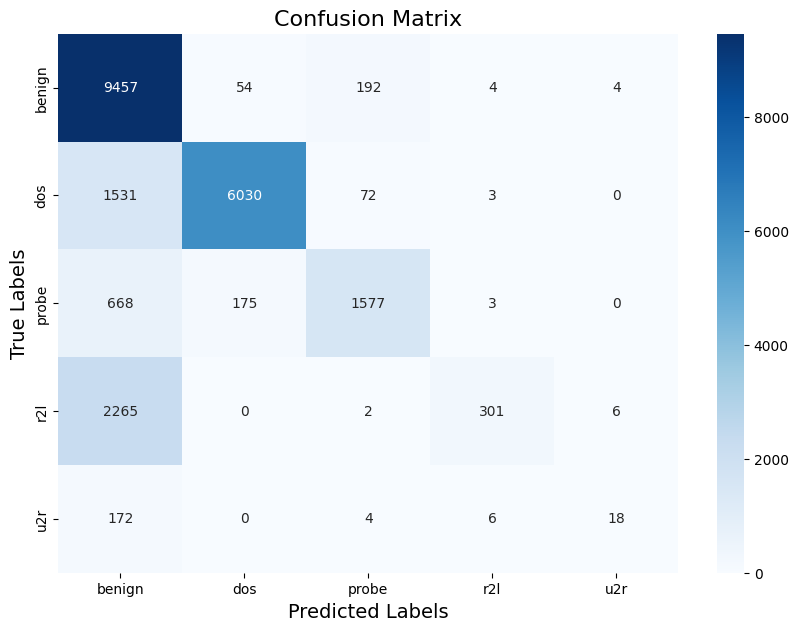

Confusion Matrix:
 [[9457   54  192    4    4]
 [1531 6030   72    3    0]
 [ 668  175 1577    3    0]
 [2265    0    2  301    6]
 [ 172    0    4    6   18]]
Zero-One Loss: 0.22893009226401706


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report, confusion_matrix
# 예측
pred_Y_class = model.predict(test_x)
pred_Y_int = np.argmax(pred_Y_class, axis=1)

# 원래의 문자열 레이블로 변환
pred_Y = label_encoder.inverse_transform(pred_Y_int)

# 클래스 레이블을 정의합니다
class_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']

# 혼동 행렬 및 에러 계산
results = confusion_matrix(test_Y, pred_Y)
error = zero_one_loss(test_Y, pred_Y)

# 혼동 행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(results, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
print(classification_report(test_Y, pred_Y, target_names=class_labels))

# 축 설명 추가
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

plt.show()

# 결과 출력
print("Confusion Matrix:\n", results)
print("Zero-One Loss:", error)

## batch size : 32 epoch =16 No Early Stopping

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 118)               14042     
                                                                 
 dense_1 (Dense)             (None, 236)               28084     
                                                                 
 dense_2 (Dense)             (None, 236)               55932     
                                                                 
 dense_3 (Dense)             (None, 5)                 1185      
                                                                 
Total params: 99243 (387.67 KB)
Trainable params: 99243 (387.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/16
3150/3150 [==============================] - 13s 3ms/step - loss: 0.0609 - categorical_accuracy: 0.9805 - val_loss: 0.0355 - val_categorica

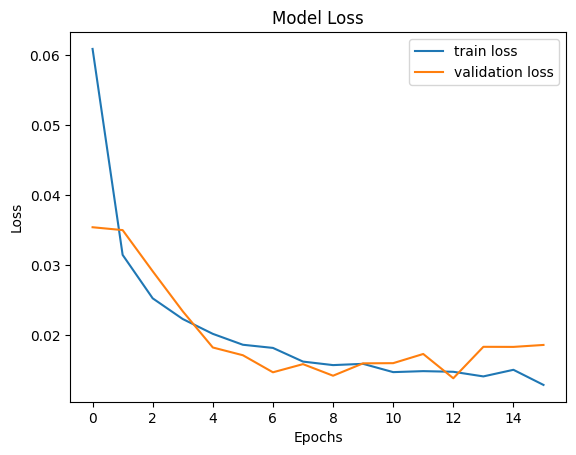

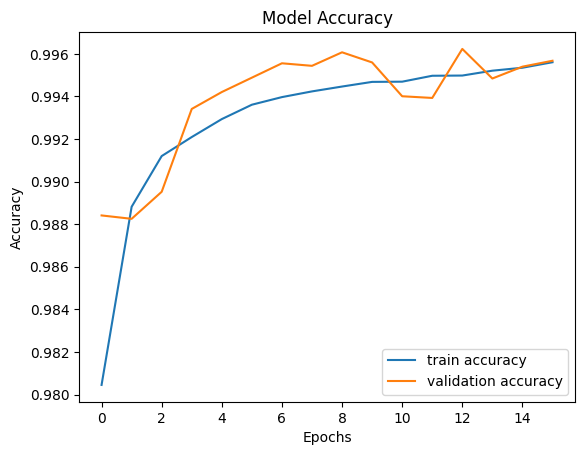

In [35]:
#41개 feature->118개??

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
import matplotlib.pyplot as plt

# Experimenting with MinMaxScaler on the single 'duration' feature
from sklearn.preprocessing import MinMaxScaler

# Let's proceed with StandardScaler- Apply to all the numeric columns

min_max_scaler = MinMaxScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = \
    min_max_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = \
    min_max_scaler.transform(test_x[numeric_cols])

train_Y_bin = train_Y.apply(lambda x: 0 if x is 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x is 'benign' else 1)

# 모델 정의
model = Sequential()

# 입력층
model.add(Dense(118, input_dim=118, activation=None))

# 은닉층 #1
model.add(Dense(236, activation='relu'))

# 은닉층 #2
model.add(Dense(236, activation='relu'))

# 출력층
model.add(Dense(5, activation='softmax'))

# 모델 컴파일
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=[CategoricalAccuracy()])

# 모델 요약 출력
model.summary()

# 모델 학습
history = model.fit(train_x,train_Y_class, epochs=16, batch_size=32, validation_split=0.2, verbose=1)

# 모델 평가
loss, accuracy = model.evaluate(test_x,test_Y_class, verbose=1)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# 학습 손실 시각화
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 학습 정확도 시각화
plt.plot(history.history['categorical_accuracy'], label='train accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


705/705 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

      benign       0.70      0.93      0.80      9711
         dos       0.89      0.81      0.85      7636
       probe       0.85      0.74      0.79      2423
         r2l       0.56      0.14      0.22      2574
         u2r       0.79      0.07      0.14       200

    accuracy                           0.77     22544
   macro avg       0.76      0.54      0.56     22544
weighted avg       0.77      0.77      0.74     22544



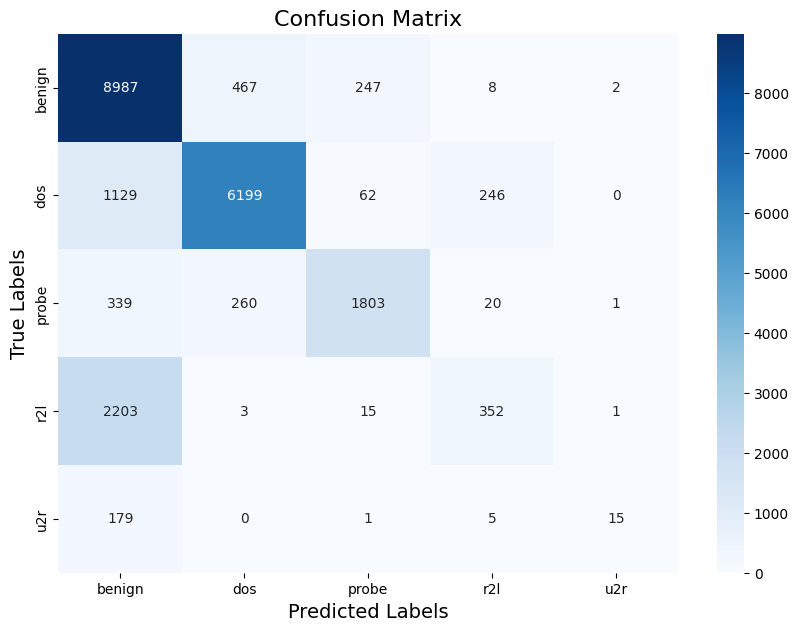

Confusion Matrix:
 [[8987  467  247    8    2]
 [1129 6199   62  246    0]
 [ 339  260 1803   20    1]
 [2203    3   15  352    1]
 [ 179    0    1    5   15]]
Zero-One Loss: 0.2301277501774308


In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report, confusion_matrix
# 예측
pred_Y_class = model.predict(test_x)
pred_Y_int = np.argmax(pred_Y_class, axis=1)

# 원래의 문자열 레이블로 변환
pred_Y = label_encoder.inverse_transform(pred_Y_int)

# 클래스 레이블을 정의합니다
class_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']

# 혼동 행렬 및 에러 계산
results = confusion_matrix(test_Y, pred_Y)
error = zero_one_loss(test_Y, pred_Y)

# 혼동 행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(results, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
print(classification_report(test_Y, pred_Y, target_names=class_labels))

# 축 설명 추가
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

plt.show()

# 결과 출력
print("Confusion Matrix:\n", results)
print("Zero-One Loss:", error)

## batch size : 32 epoch =12 No Early Stopping

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 118)               14042     
                                                                 
 dense_5 (Dense)             (None, 236)               28084     
                                                                 
 dense_6 (Dense)             (None, 236)               55932     
                                                                 
 dense_7 (Dense)             (None, 5)                 1185      
                                                                 
Total params: 99243 (387.67 KB)
Trainable params: 99243 (387.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/12
3150/3150 [==============================] - 11s 3ms/step - loss: 0.0595 - categorical_accuracy: 0.9809 - val_loss: 0.0358 - val_categori

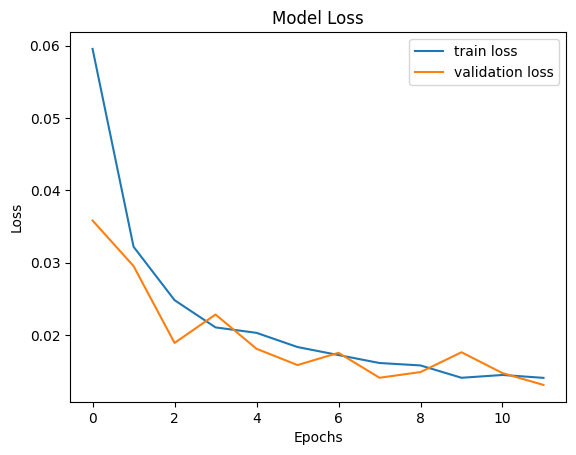

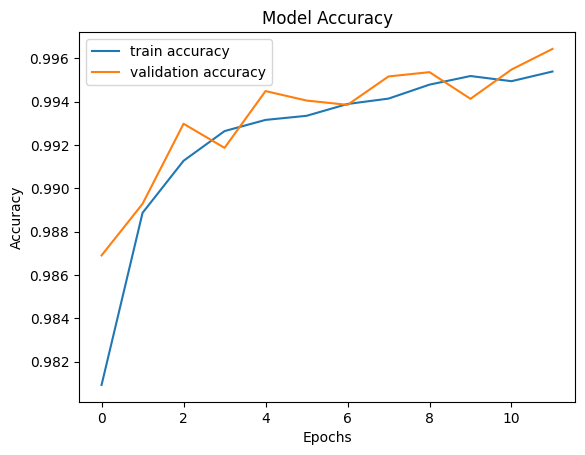

In [37]:
#41개 feature->118개??

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
import matplotlib.pyplot as plt

# Experimenting with MinMaxScaler on the single 'duration' feature
from sklearn.preprocessing import MinMaxScaler

# Let's proceed with StandardScaler- Apply to all the numeric columns

min_max_scaler = MinMaxScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = \
    min_max_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = \
    min_max_scaler.transform(test_x[numeric_cols])

train_Y_bin = train_Y.apply(lambda x: 0 if x is 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x is 'benign' else 1)

# 모델 정의
model = Sequential()

# 입력층
model.add(Dense(118, input_dim=118, activation=None))

# 은닉층 #1
model.add(Dense(236, activation='relu'))

# 은닉층 #2
model.add(Dense(236, activation='relu'))

# 출력층
model.add(Dense(5, activation='softmax'))

# 모델 컴파일
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=[CategoricalAccuracy()])

# 모델 요약 출력
model.summary()

# 모델 학습
history = model.fit(train_x,train_Y_class, epochs=12, batch_size=32, validation_split=0.2, verbose=1)

# 모델 평가
loss, accuracy = model.evaluate(test_x,test_Y_class, verbose=1)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# 학습 손실 시각화
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 학습 정확도 시각화
plt.plot(history.history['categorical_accuracy'], label='train accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


705/705 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

      benign       0.66      0.97      0.79      9711
         dos       0.96      0.80      0.87      7636
       probe       0.85      0.65      0.74      2423
         r2l       0.49      0.03      0.05      2574
         u2r       0.66      0.10      0.17       200

    accuracy                           0.76     22544
   macro avg       0.72      0.51      0.52     22544
weighted avg       0.76      0.76      0.72     22544



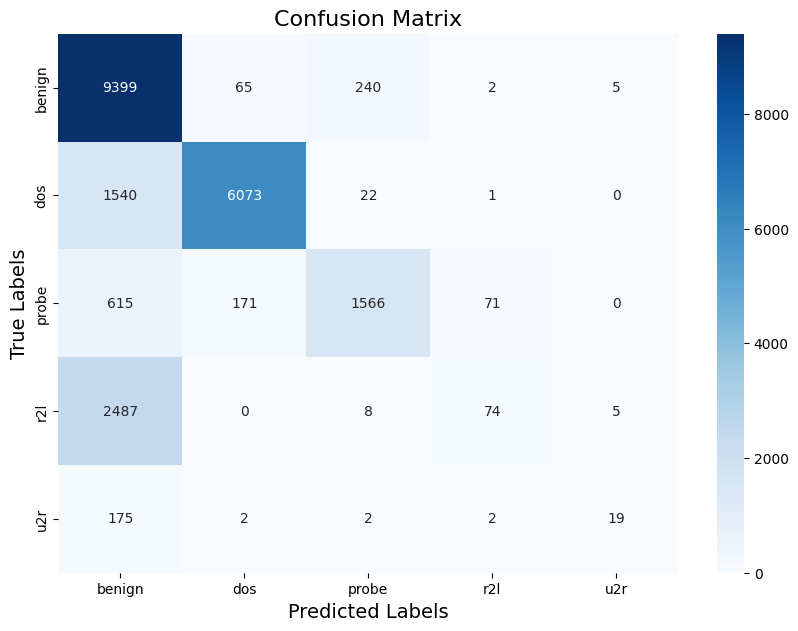

Confusion Matrix:
 [[9399   65  240    2    5]
 [1540 6073   22    1    0]
 [ 615  171 1566   71    0]
 [2487    0    8   74    5]
 [ 175    2    2    2   19]]
Zero-One Loss: 0.24010823278921223


In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report, confusion_matrix
# 예측
pred_Y_class = model.predict(test_x)
pred_Y_int = np.argmax(pred_Y_class, axis=1)

# 원래의 문자열 레이블로 변환
pred_Y = label_encoder.inverse_transform(pred_Y_int)

# 클래스 레이블을 정의합니다
class_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']

# 혼동 행렬 및 에러 계산
results = confusion_matrix(test_Y, pred_Y)
error = zero_one_loss(test_Y, pred_Y)

# 혼동 행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(results, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
print(classification_report(test_Y, pred_Y, target_names=class_labels))

# 축 설명 추가
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

plt.show()

# 결과 출력
print("Confusion Matrix:\n", results)
print("Zero-One Loss:", error)

# 4. Deep learning: **Few-shot learning**

### 1. Preprocessing Data

1. 3 non-numeric features & 37 numeric features
2. one-hot encoding

* Final NSL-KDD feature: 121-dimensional
* 논문에서는 121 dimension이지만, 내가 처리한 데이터는 118 dimension이기 때문에 121(11*11 pixel)로 만들어주기 위해 3만큼 0-padding을 해줌.
3. logarithm transformation :  log (xi + 1)
* similarity assessment를 위해
* compress the range of large numbers and extend the range of small numbers
4. normalization (Min-max Scaler)


### 2. THE RESAMPLED TRAINING DATASET

* the samples training set was balanced by **resampling.**

* For the multi-class classiﬁcation experiment, we selected 50 samples and sampled them ten times for each class. The sampled **2500 (5 ∗ 50 ∗ 10) samples** were used as the new training dataset.

* 50 sample인 이유는 train set에서 가장 적은 모수를 가진 label인 'u2r'이 52개의 case밖에 없기 때문이다.

### 3. THE CHOICE OF SUPPORT SET

* Selecting samples from the training set as our support set, we randomly selected some samples from each class as the support set from the testing set -> 논문에서는 testing set에서 support set을 학습하였지만, 실제 구현한 결과 이는 overfitting이 과도하게 되었고, support set을 test set에서 학습한다면 NSL-KDD 데이터셋의 목적 자체가 label 분포가 다른 train, test에서 train 데이터셋을 학습하여 test를 잘 예측해보자는, generalization 평가의 목적을 잃을 것 같아 **training dataset**에서 support set을 뽑기로 하였다.
*  NSL-KDD multi-class clas-siﬁcation experiment, we selected **50 samples(5*10 samples per class)** from the test set as the support set. The support set only accounted for 0.22% of the testing set, but the accuracy has been improved by 4%.

### 4. Embedding Function: CNN

* 3 layers
* filter : 3*3 (commonly use)
* Parameter:
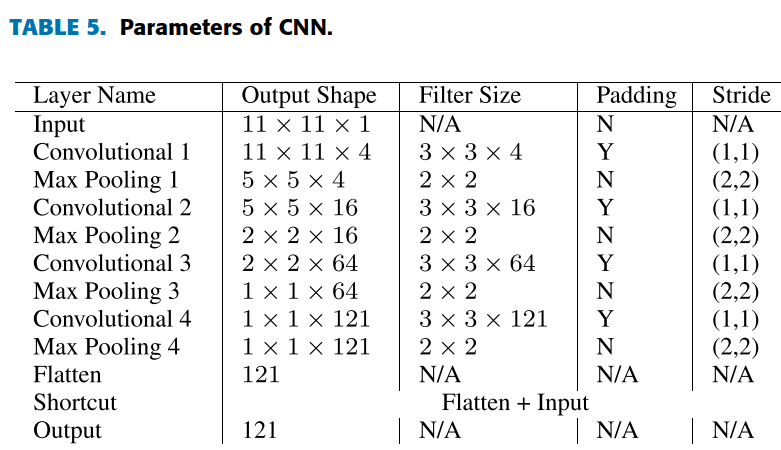

### 5. Distance Function: Center Loss + Cosine

### 6. Training episode : algorithm 1
* minimize loss function via gradientdescent

#### **Loss function**: **softmax + \lambda • Center loss**
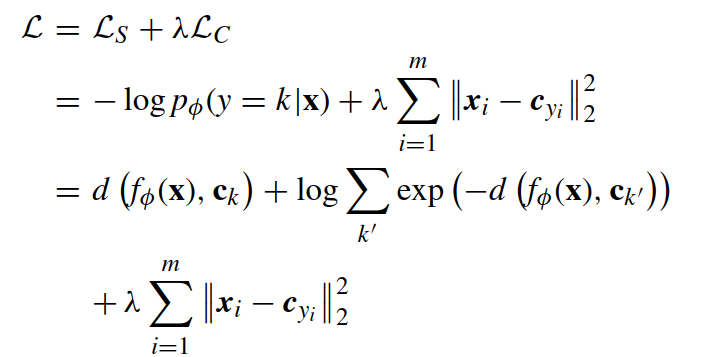

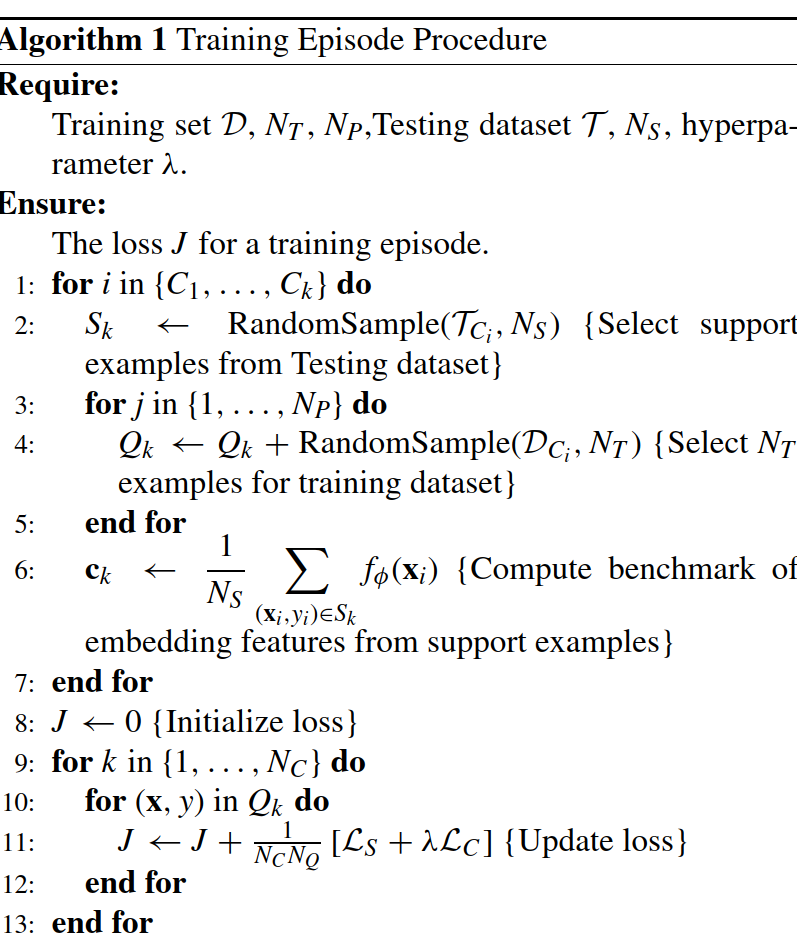

### 7. Model Framework - Testing phase for Multi-class classification

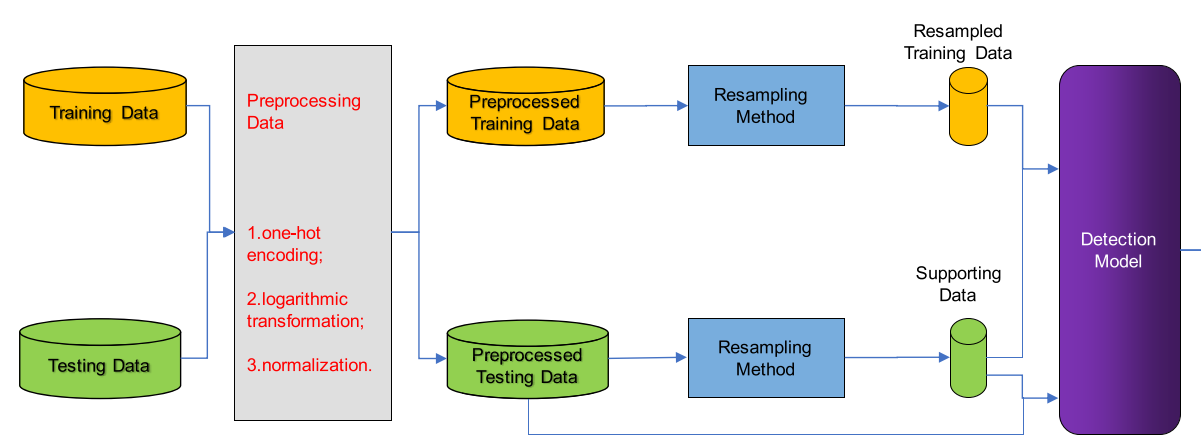

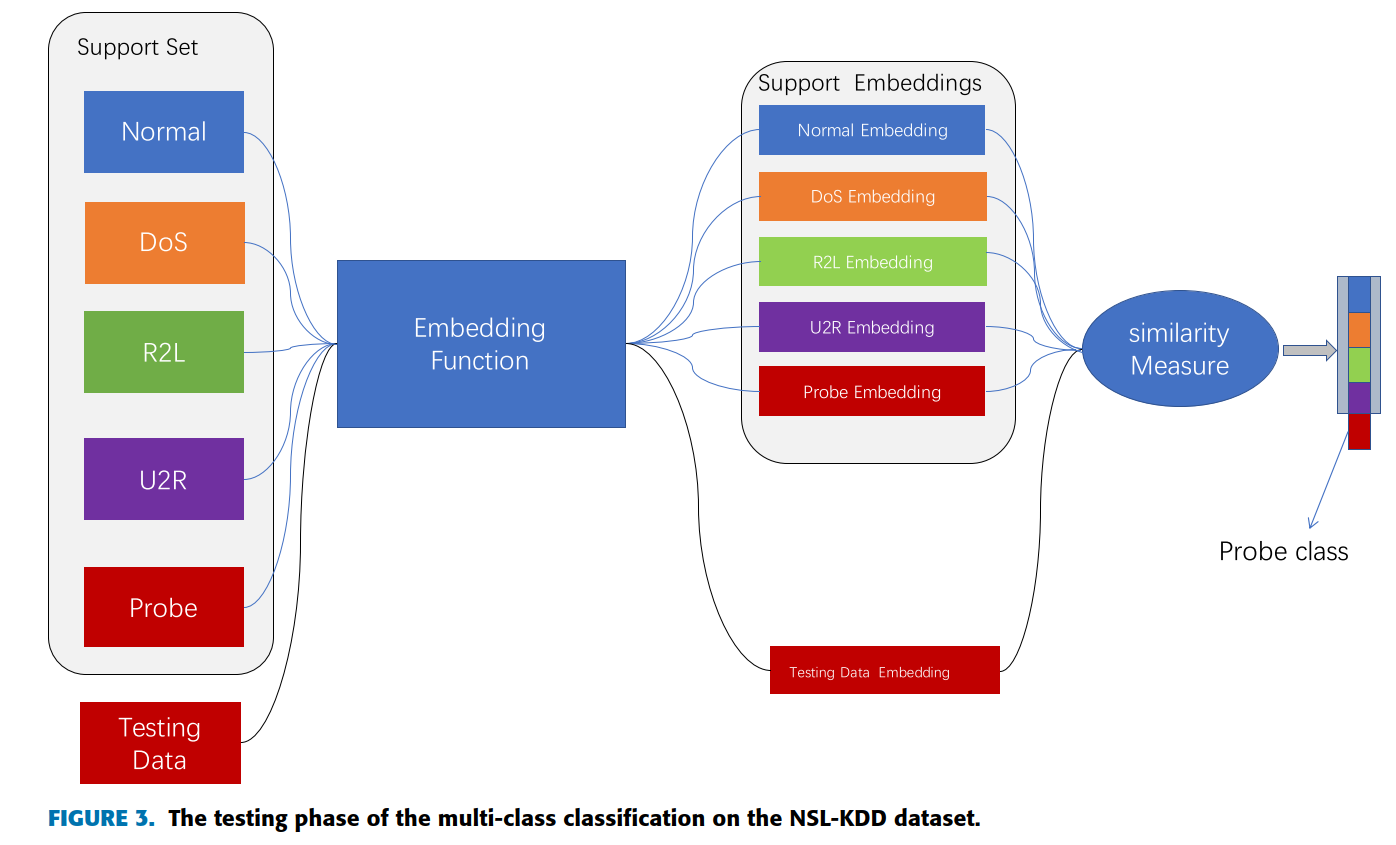

Epoch 1/10
Episode 1/10
Training loss for episode 1: 1.7907266699314117
Episode 2/10
Training loss for episode 2: 2.033881601238251
Episode 3/10
Training loss for episode 3: 1.7940456679344177
Episode 4/10
Training loss for episode 4: 1.6912277391433717
Episode 5/10
Training loss for episode 5: 1.6494551920890808
Episode 6/10
Training loss for episode 6: 1.6328037806510924
Episode 7/10
Training loss for episode 7: 1.6263463167190553
Episode 8/10
Training loss for episode 8: 1.6241627548217774
Episode 9/10
Training loss for episode 9: 1.6236297952651977
Episode 10/10
Training loss for episode 10: 1.623558840084076
Epoch 1/10, Loss: 1.7089838357877734
Epoch 2/10
Episode 1/10
Training loss for episode 1: 1.6235515903472901
Episode 2/10
Training loss for episode 2: 1.6235487436294556
Episode 3/10
Training loss for episode 3: 1.6235472217559814
Episode 4/10
Training loss for episode 4: 1.6235464334487915
Episode 5/10
Training loss for episode 5: 1.6235459694862366
Episode 6/10
Training loss

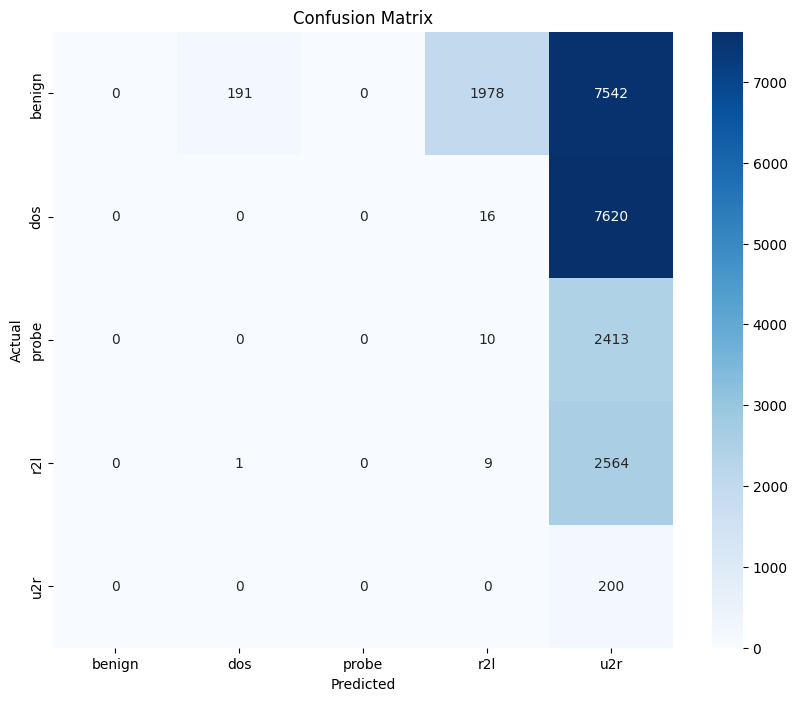

Zero-One Loss: 0.9907292405961675
              precision    recall  f1-score   support

      benign       0.00      0.00      0.00      9711
         dos       0.00      0.00      0.00      7636
       probe       0.00      0.00      0.00      2423
         r2l       0.00      0.00      0.00      2574
         u2r       0.01      1.00      0.02       200

    accuracy                           0.01     22544
   macro avg       0.00      0.20      0.00     22544
weighted avg       0.00      0.01      0.00     22544



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Center Loss Definition

class CenterLoss(nn.Module):
    def __init__(self, num_classes=10, feat_dim=2, use_gpu=True):
        super(CenterLoss, self).__init__()
        self.num_classes = num_classes
        self.feat_dim = feat_dim
        self.use_gpu = use_gpu

        if self.use_gpu:
            self.centers = nn.Parameter(torch.randn(self.num_classes, self.feat_dim).cuda())
        else:
            self.centers = nn.Parameter(torch.randn(self.num_classes, self.feat_dim))

    def forward(self, x, labels):
        batch_size = x.size(0)
        distmat = torch.pow(x, 2).sum(dim=1, keepdim=True).expand(batch_size, self.num_classes) + \
                  torch.pow(self.centers, 2).sum(dim=1, keepdim=True).expand(self.num_classes, batch_size).t()
        distmat.addmm_(1, -2, x, self.centers.t())

        # Ensure labels are correctly shaped
        if labels.dim() == 1:
            labels = labels.unsqueeze(1)
        labels = labels.expand(batch_size, self.num_classes)

        classes = torch.arange(self.num_classes).long()
        if self.use_gpu:
            classes = classes.cuda()
        mask = labels.eq(classes.expand(batch_size, self.num_classes))

        dist = distmat * mask.float()
        loss = dist.clamp(min=1e-12, max=1e+12).sum() / batch_size

        return loss

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# Define a Residual Block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

# CNN Model Definition with Residual Blocks
class CNNModel(nn.Module):
    def __init__(self, input_shape, embedding_dim=121, num_classes=5):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3, padding=1)

        # Adding Residual Blocks with reduced downsampling
        self.res_block1 = ResidualBlock(4, 16, stride=1)
        self.res_block2 = ResidualBlock(16, 64, stride=1)
        self.res_block3 = ResidualBlock(64, 121, stride=1)

        # Only one pooling layer after initial conv and res blocks
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Calculate the size of the output after the residual blocks
        self._to_linear = None
        self.convs(torch.randn(1, *input_shape))

        self.fc = nn.Linear(self._to_linear, embedding_dim)
        self.classifier = nn.Linear(embedding_dim, num_classes)

    def convs(self, x):
        x = F.relu(self.conv1(x))           # Initial conv
        x = self.pool(x)                    # Pooling after initial conv
        x = self.res_block1(x)              # Residual block 1
        x = self.res_block2(x)              # Residual block 2
        x = self.res_block3(x)              # Residual block 3
        x = self.pool(x)                    # Pooling after res_block3

        if self._to_linear is None:
            self._to_linear = x.view(x.size(0), -1).shape[1]
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(x.size(0), -1)
        embeddings = F.relu(self.fc(x))
        outputs = self.classifier(embeddings)
        return embeddings, outputs

# Data Preparation
def prepare_data():
    # Example datasets and parameters
    # train_x = np.random.rand(125973, 118)  # Training set features
    # train_Y = np.random.choice(['benign', 'dos', 'probe', 'r2l', 'u2r'], 125973)  # Training set labels
    # test_x = np.random.rand(22544, 118)  # Testing set features
    # test_Y = np.random.choice(['benign', 'dos', 'probe', 'r2l', 'u2r'], 22544)  # Testing set labels
    train_x = combined_df[:len(train_x_raw)]
    test_x = combined_df[len(train_x_raw):]
    # 1,2. 정수 변환
    import pandas as pd
    train_x.iloc[:, 37:118] = train_x.iloc[:, 37:118].astype(int)
    test_x.iloc[:, 37:118] = test_x.iloc[:, 37:118].astype(int)

    # 3. logarithm
    train_x = train_x.applymap(lambda x: np.log(x + 1))
    test_x = test_x.applymap(lambda x: np.log(x + 1))

    # 4. MinMaxScaler
    from sklearn.preprocessing import MinMaxScaler
    min_max_scaler = MinMaxScaler().fit(train_x[numeric_cols])

    train_x[numeric_cols] = \
    min_max_scaler.transform(train_x[numeric_cols])

    test_x[numeric_cols] = \
    min_max_scaler.transform(test_x[numeric_cols])

    # Padding to make it 121 elements
    pad_width = 121 - 118
    train_x = np.pad(train_x, ((0, 0), (0, pad_width)), mode='constant')
    test_x = np.pad(test_x, ((0, 0), (0, pad_width)), mode='constant')

    # Reshape and convert to torch tensors
    train_x = torch.tensor(train_x.reshape(-1, 1, 11, 11), dtype=torch.float32)
    test_x = torch.tensor(test_x.reshape(-1, 1, 11, 11), dtype=torch.float32)
    test_x = test_x.to(device)

    # Encode labels
    train_Y = train_df['attack_category']
    test_Y = test_df['attack_category']
    label_encoder = LabelEncoder()
    train_Y_int = label_encoder.fit_transform(train_Y)
    test_Y_int = label_encoder.transform(test_Y)

    train_Y = torch.tensor(train_Y_int, dtype=torch.long)
    test_Y = torch.tensor(test_Y_int, dtype=torch.long)

    # Create datasets and dataloaders
    train_dataset = TensorDataset(train_x, train_Y)
    test_dataset = TensorDataset(test_x, test_Y)
    return train_dataset, test_dataset, label_encoder.classes_

# Training Episode Function
def training_episode(train_loader, test_x, test_Y, model, center_loss_func, criterion, optimizer, N_T, N_P, N_S, lambda_, num_classes, device):
    model.train()
    J = 0  # Initialize total loss

    for episode in range(N_P):
        print(f"Episode {episode + 1}/{N_P}")
        episode_loss = 0  # Initialize loss for this episode
        count = 0  # Counter for number of iterations
        for class_label in range(num_classes):
            # Step 2: Select support examples from the testing dataset
            support_indices = torch.where(test_Y == class_label)[0]
            support_indices = support_indices[torch.randperm(len(support_indices))[:N_S]].to(device)
            S_k = test_x[support_indices].to(device)

            # Step 3: Select training examples from the training dataset
            Q_k = []
            Q_y = []
            for j in range(num_classes):
                train_indices = torch.where(train_loader.dataset.tensors[1] == j)[0]
                sampled_indices = train_indices[torch.randperm(len(train_indices))[:N_T]]
                Q_k.append(train_loader.dataset.tensors[0][sampled_indices])
                Q_y.append(train_loader.dataset.tensors[1][sampled_indices])
            Q_k = torch.cat(Q_k).to(device)
            Q_y = torch.cat(Q_y).to(device)

            # Compute the benchmark of embedding features
            with torch.no_grad():
                S_k_embeddings, _ = model(S_k)
            c_k = S_k_embeddings.mean(dim=0)

            for x, y in zip(Q_k, Q_y):
                x = x.unsqueeze(0)  # Reshape to match model input shape
                optimizer.zero_grad()
                embeddings, outputs = model(x)
                L_S = criterion(outputs, y.unsqueeze(0))
                L_C = center_loss_func(embeddings, y)
                loss = L_S + lambda_ * L_C
                loss.backward()
                optimizer.step()
                J += (1 / (num_classes * N_P * len(Q_k))) * loss.item()
                episode_loss += loss.item()
                count += 1

        # Compute average loss for this episode
        average_loss = episode_loss / count
        print(f"Training loss for episode {episode + 1}: {average_loss}")

    return J

# Training Loop
def train(train_loader, test_loader, model, center_loss_func, criterion, optimizer, epochs, N_T, N_P, N_S, lambda_, num_classes, device):
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        final_loss = training_episode(train_loader, test_loader.dataset.tensors[0], test_loader.dataset.tensors[1], model, center_loss_func, criterion, optimizer, N_T, N_P, N_S, lambda_, num_classes, device)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {final_loss}')

# Evaluation Function
def evaluate(test_loader, model, label_encoder):
    model.eval()
    test_x, test_Y = test_loader.dataset.tensors
    with torch.no_grad():
        embeddings, outputs = model(test_x.cuda())
    predicted_labels = torch.argmax(outputs, dim=1).cpu().numpy()

    from sklearn.metrics import confusion_matrix, classification_report
    # Evaluate with confusion matrix
    conf_matrix = confusion_matrix(test_Y.cpu().numpy(), predicted_labels)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder, yticklabels=label_encoder)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    from sklearn.metrics import confusion_matrix, zero_one_loss
    error = zero_one_loss(test_Y.cpu().numpy(), predicted_labels)
    print("Zero-One Loss:", error)

    # Print classification report
    print(classification_report(test_Y.cpu().numpy(), predicted_labels, target_names=label_encoder))

# Main Function
if __name__ == "__main__":
    # Hyperparameters
    N_T = 50  # Number of training samples per class
    N_P = 10  # Number of sampling episodes
    N_S = 10  # Number of support samples per class
    lambda_ = 0.01
    epochs = 10
    batch_size = 32
    num_classes = 5
    input_shape = (1, 11, 11)
    embedding_dim = 121

    # Prepare data
    train_dataset, test_dataset, class_names = prepare_data()
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Initialize model, loss functions, and optimizer
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = CNNModel(input_shape, embedding_dim, num_classes).to(device)
    center_loss_func = CenterLoss(num_classes=num_classes, feat_dim=embedding_dim, use_gpu=torch.cuda.is_available())
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(list(model.parameters()) + list(center_loss_func.parameters()), lr=0.001)

    # Train the model
    train(train_loader, test_loader, model, center_loss_func, criterion, optimizer, epochs, N_T, N_P, N_S, lambda_, num_classes, device)

    # Evaluate the model
    evaluate(test_loader, model, class_names)